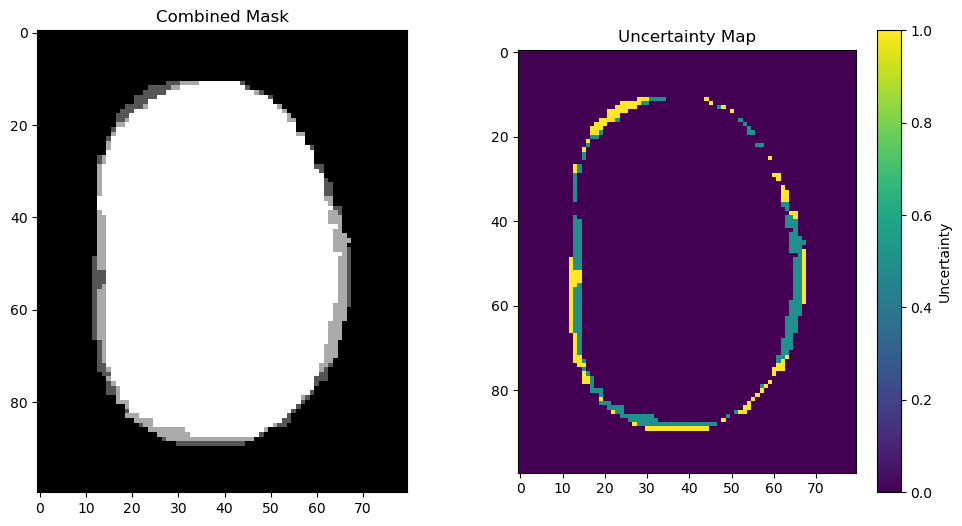

In [12]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import glob 
# Define the directory where masks are stored
mask_dir = '/home/kharroubi/Dataset/Multireader_NIFTI_crop'

PIDs_ALL = [os.path.basename(i) for i in glob.glob(os.path.join(mask_dir, 'ANON*'))]

np.random.seed(29100)
np.random.shuffle(PIDs_ALL)

# Assuming you want to load the first shuffled patient ID for mask1
patient_id = PIDs_ALL[0]

# Construct paths to the masks
mask1_path = os.path.join(mask_dir, f'{patient_id}','mask_Prostate_VB.nii.gz')
mask2_path = os.path.join(mask_dir, f'{patient_id}','mask_Prostate_ES.nii.gz')
mask3_path = os.path.join(mask_dir, f'{patient_id}','mask_Prostate_TJ.nii.gz')

# Function to load NIfTI file
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data

# Load the masks using the first patient ID
mask1 = load_nifti(mask1_path)
mask2 = load_nifti(mask2_path)
mask3 = load_nifti(mask3_path)

# Ensure masks are binary
mask1 = (mask1 > 0).astype(int)
mask2 = (mask2 > 0).astype(int)
mask3 = (mask3 > 0).astype(int)

# Combine the masks by summing them
combined_mask = mask1 + mask2 + mask3

# Define uncertainty levels
uncertainty_map = np.zeros_like(combined_mask, dtype=float)

# Low uncertainty (all masks agree)
uncertainty_map[combined_mask == 0] = 0
uncertainty_map[combined_mask == 3] = 0

# Medium uncertainty (two masks agree)
uncertainty_map[(combined_mask == 1) | (combined_mask == 2)] = 0.5

# High uncertainty (all masks disagree)
uncertainty_map[(combined_mask == 1)] = 1

# Plot the uncertainty map (for a central slice as an example)
slice_idx = combined_mask.shape[2] // 2  # central slice for 3D volume

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(combined_mask[:, :, slice_idx], cmap='gray')
plt.title('Combined Mask')

plt.subplot(1, 2, 2)
plt.imshow(uncertainty_map[:, :, slice_idx], cmap='viridis', interpolation='nearest')
plt.colorbar(label='Uncertainty')
plt.title('Uncertainty Map')

plt.show()


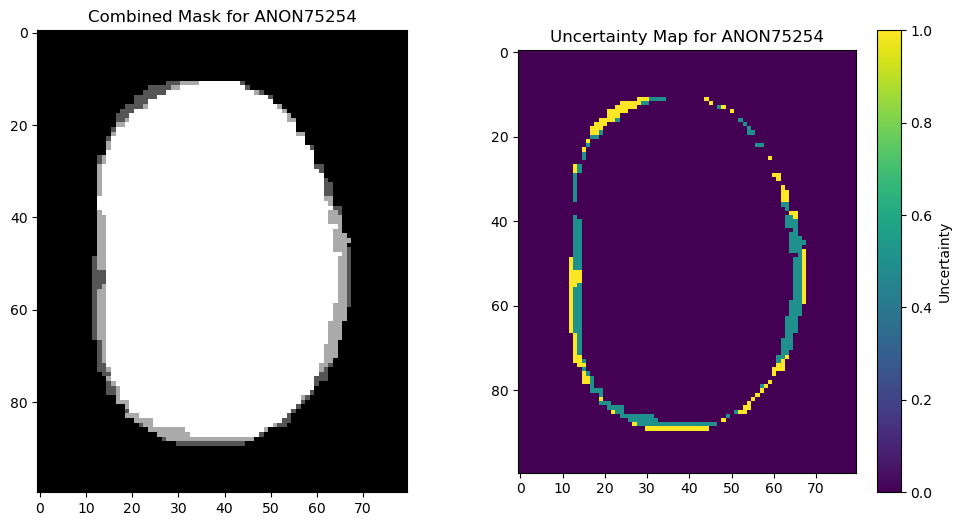

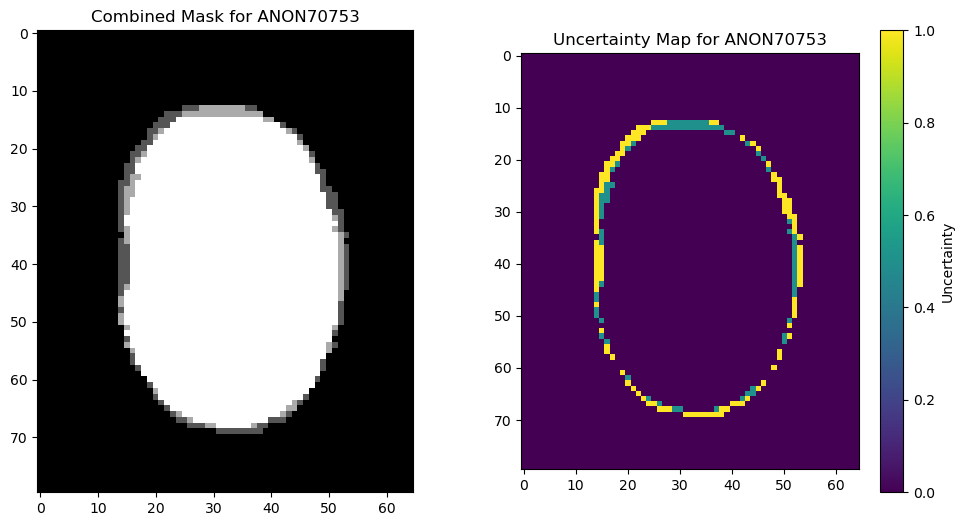

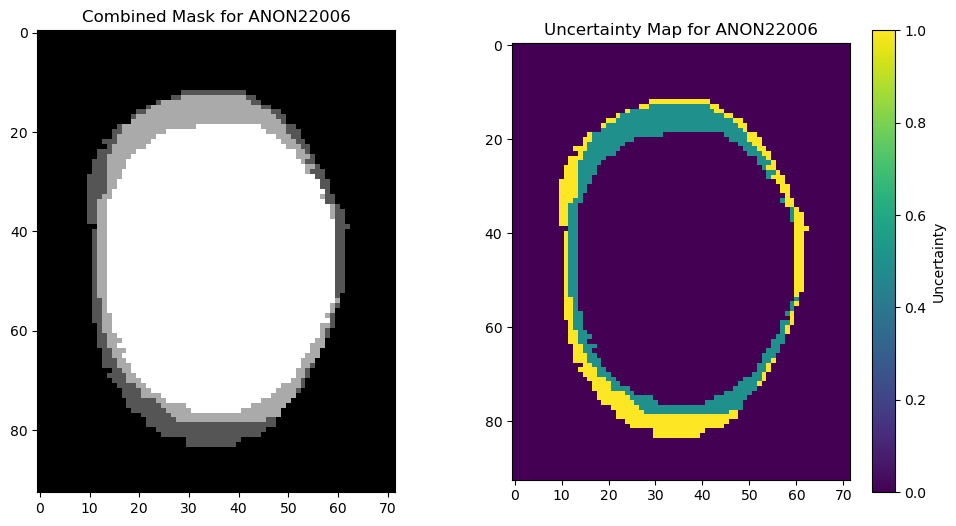

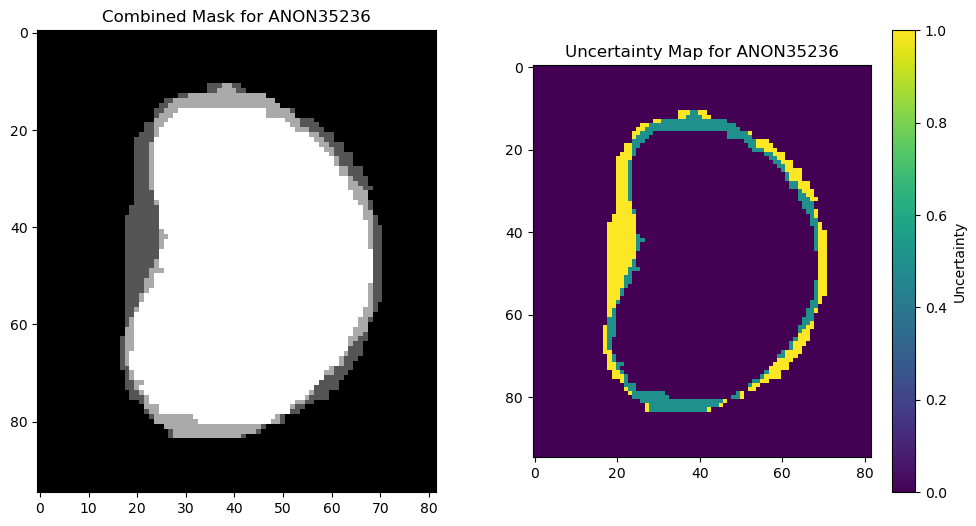

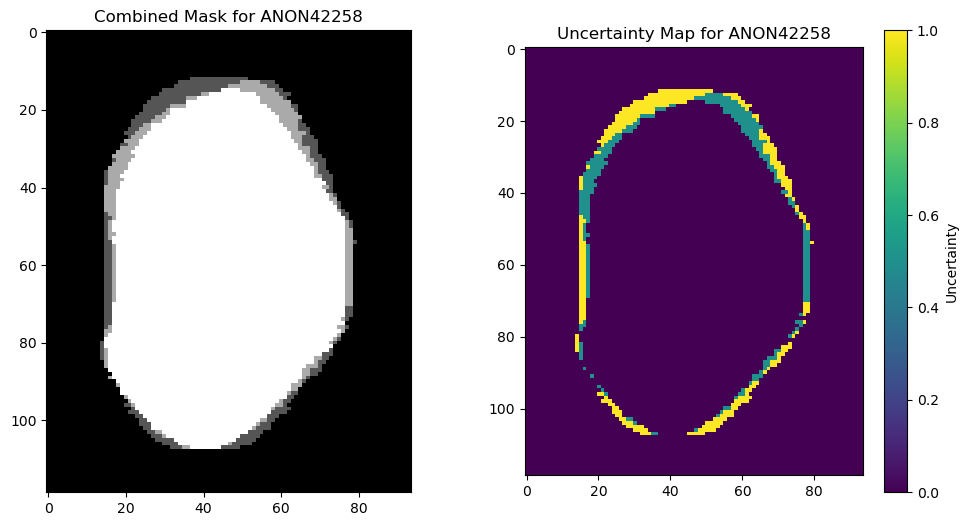

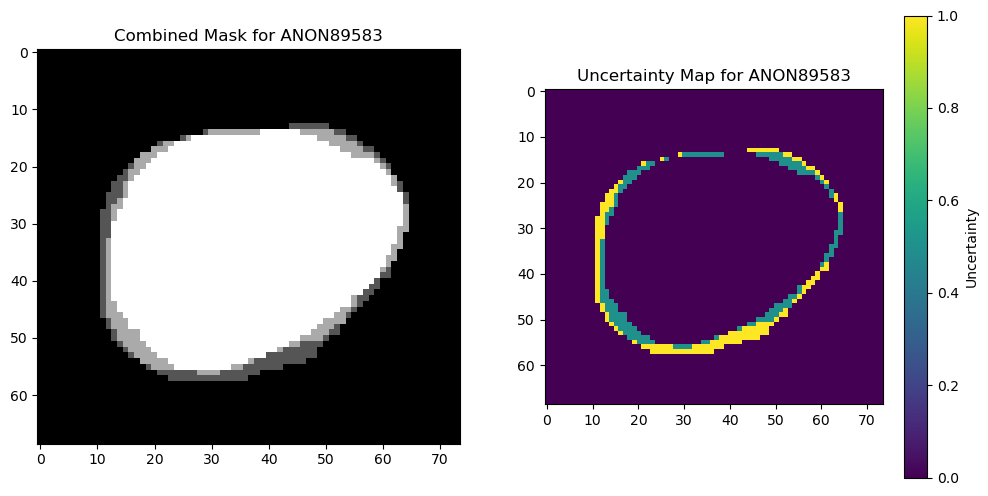

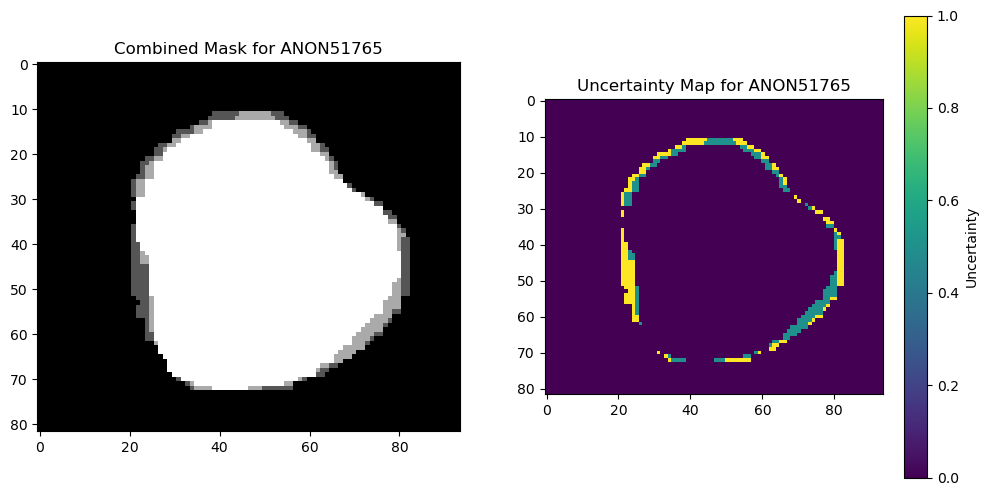

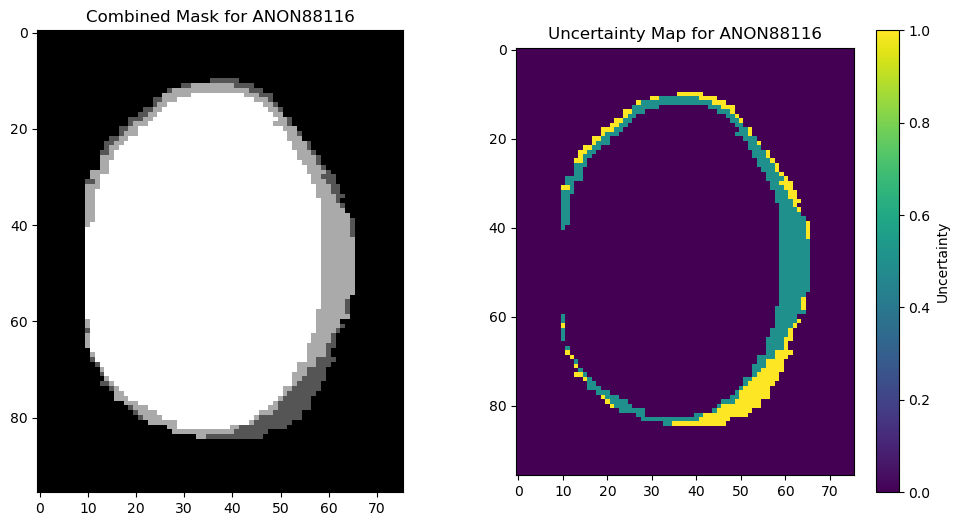

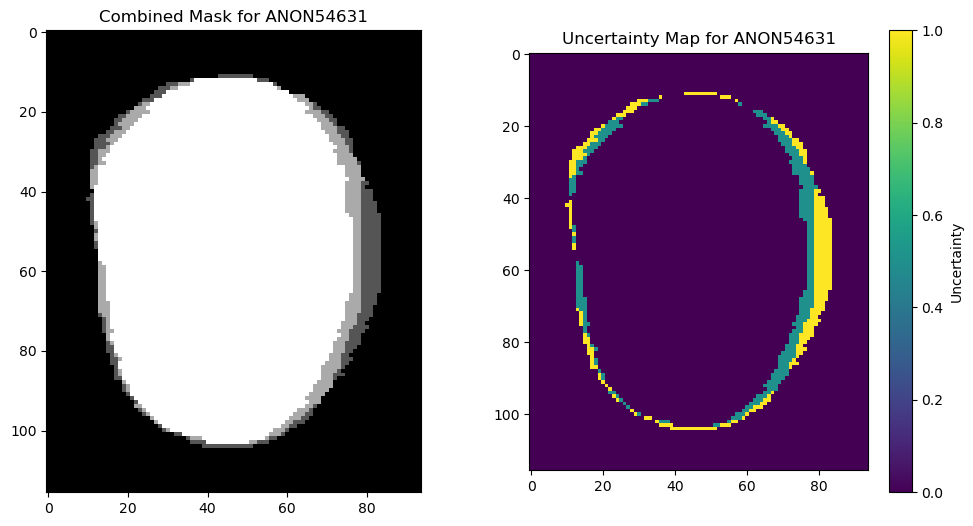

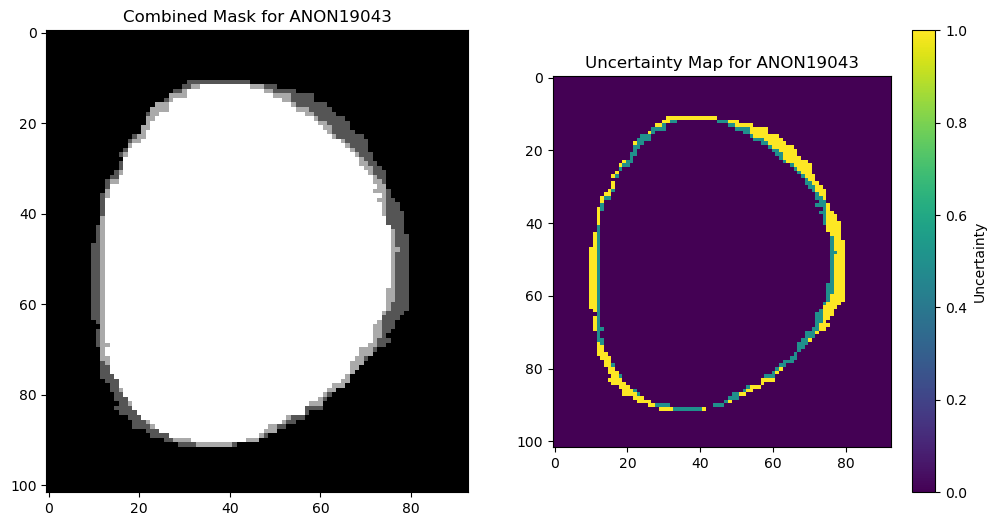

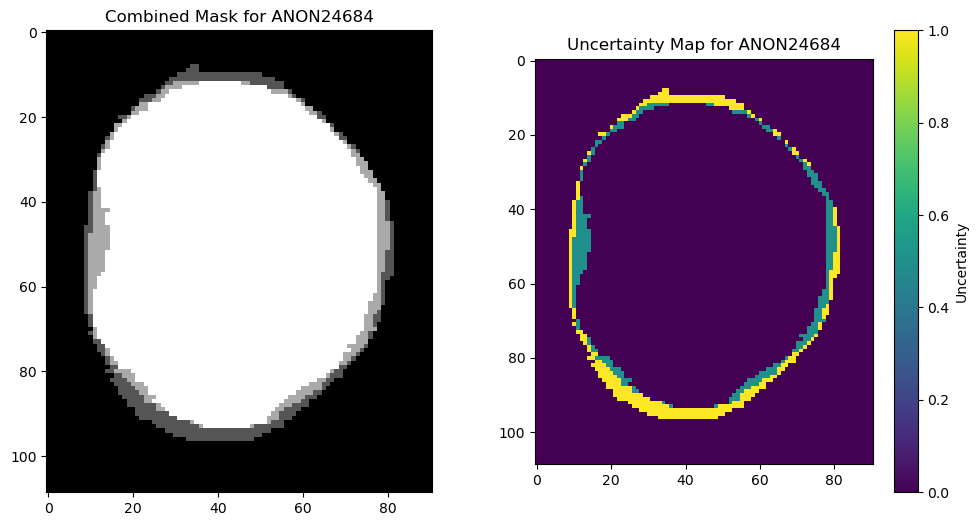

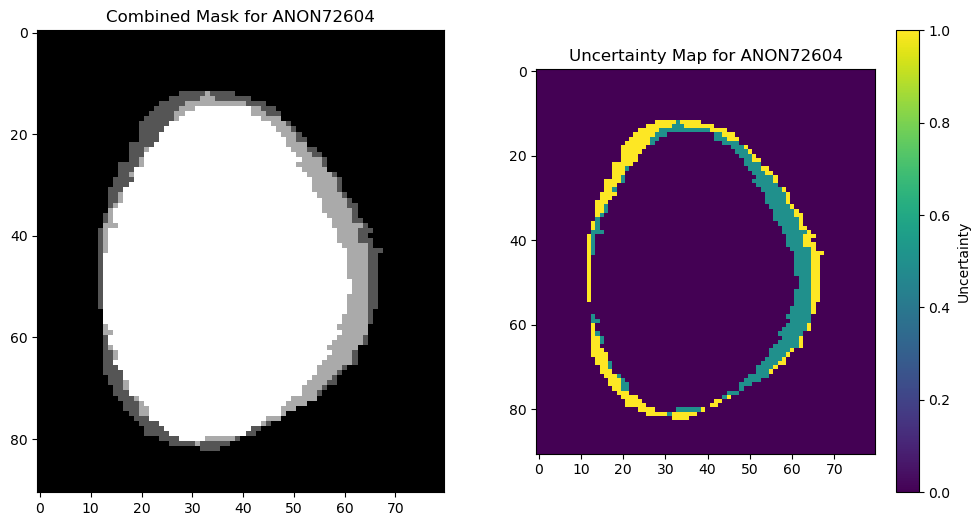

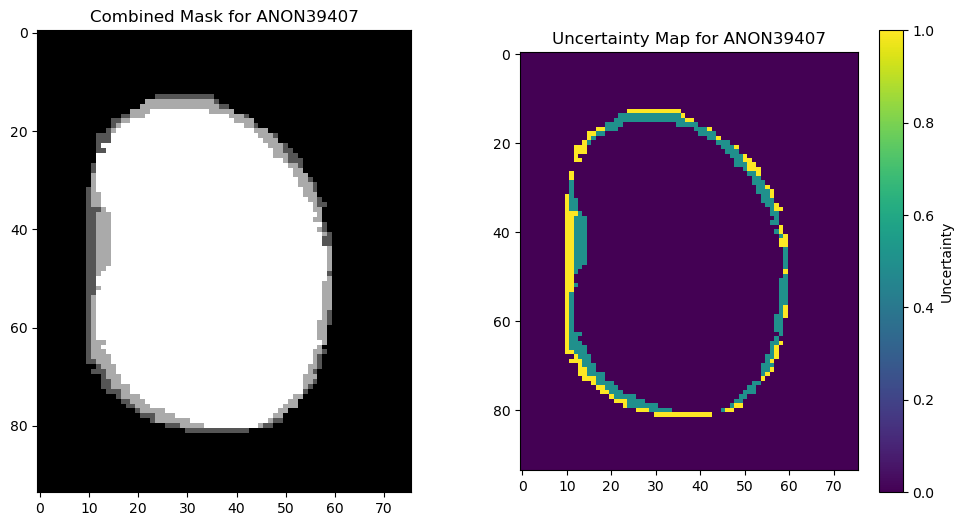

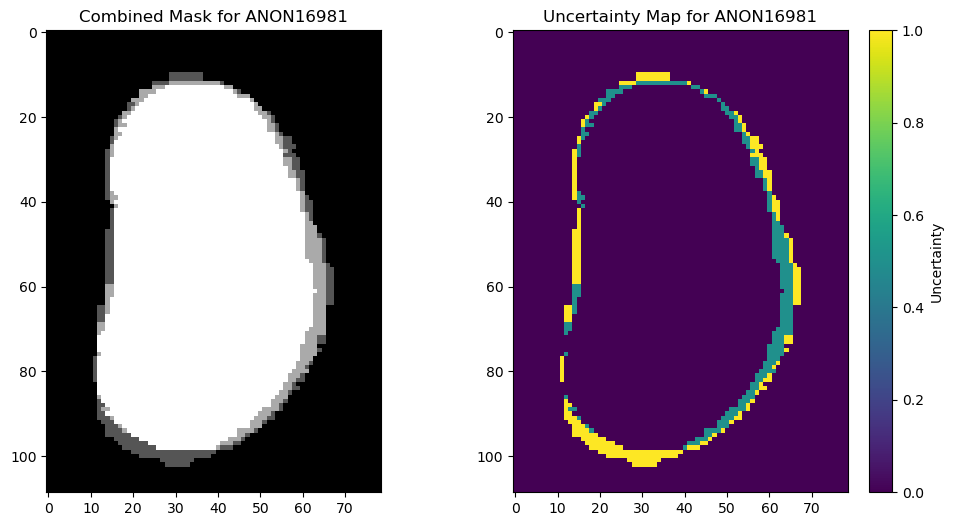

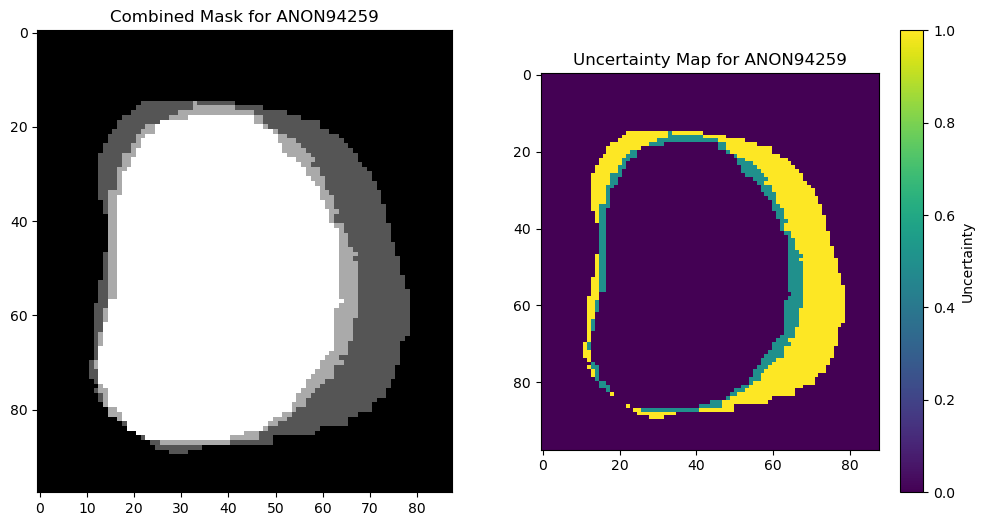

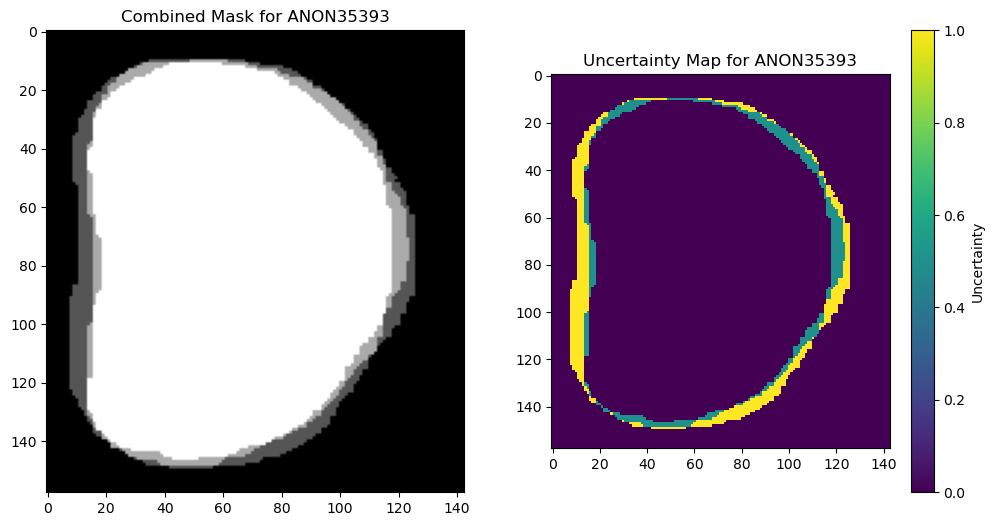

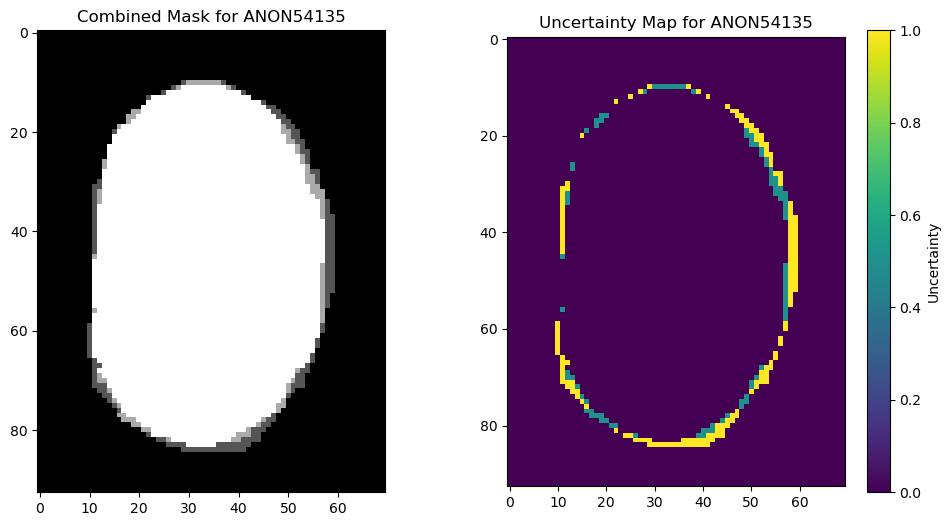

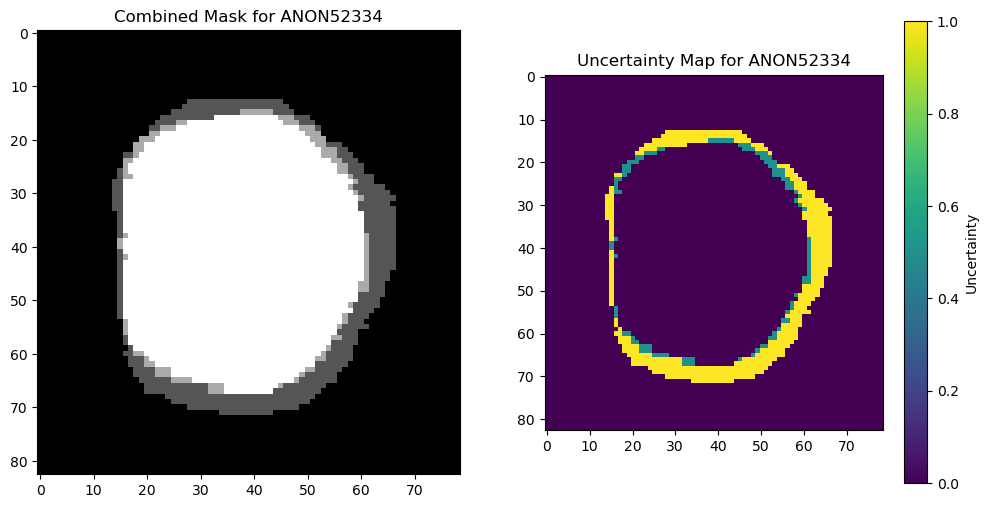

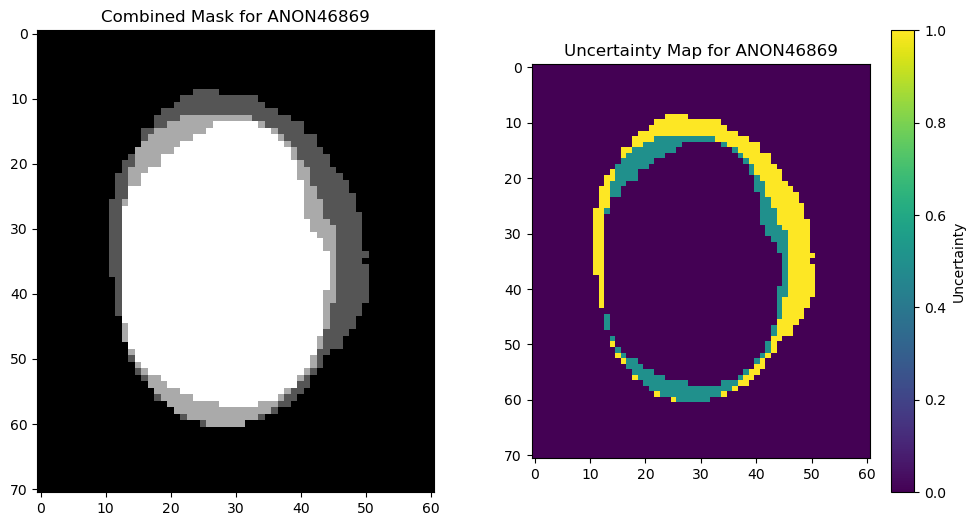

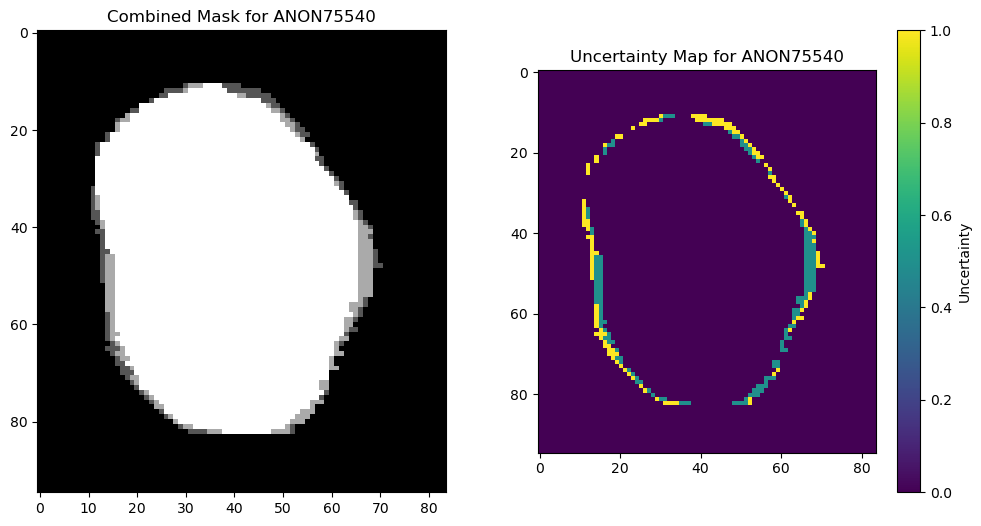

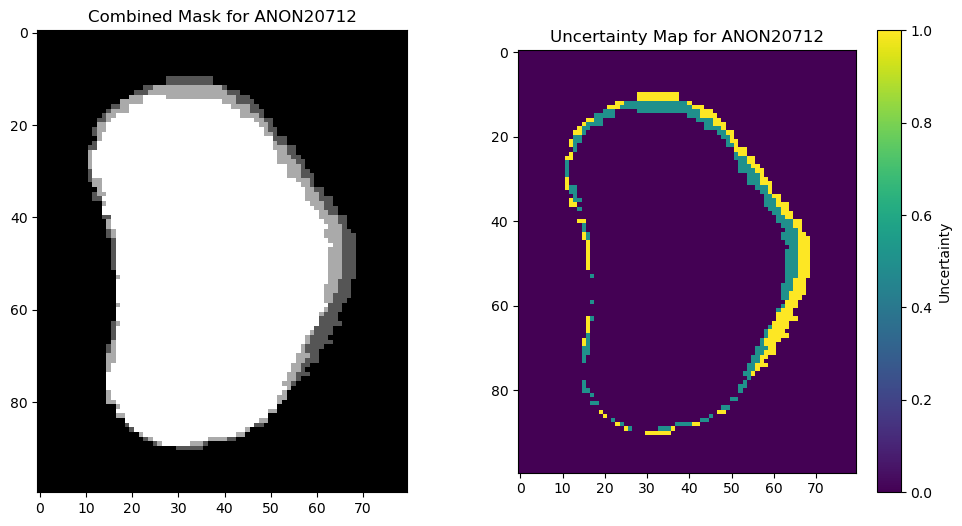

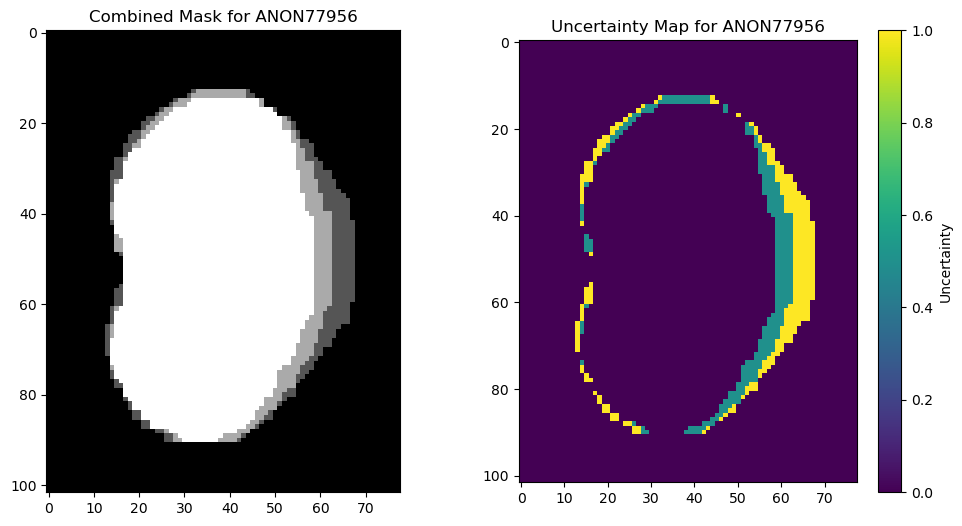

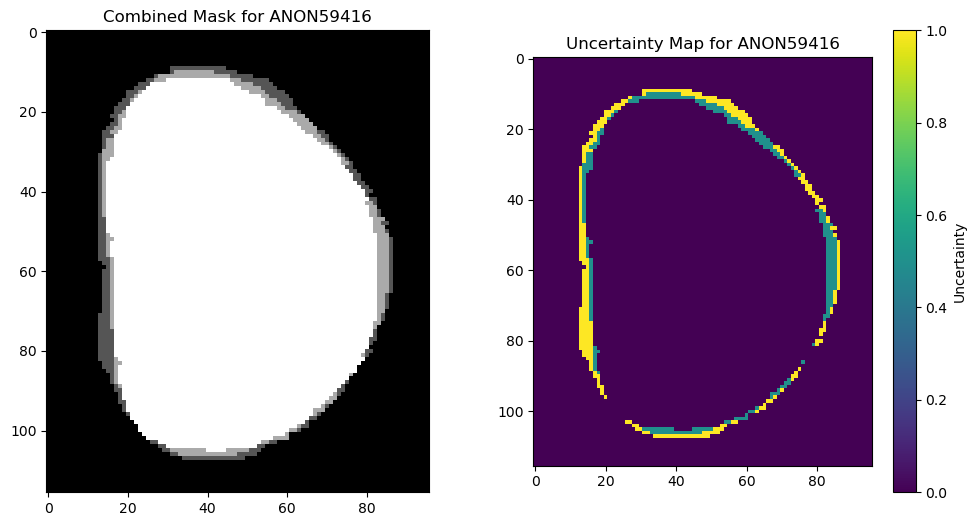

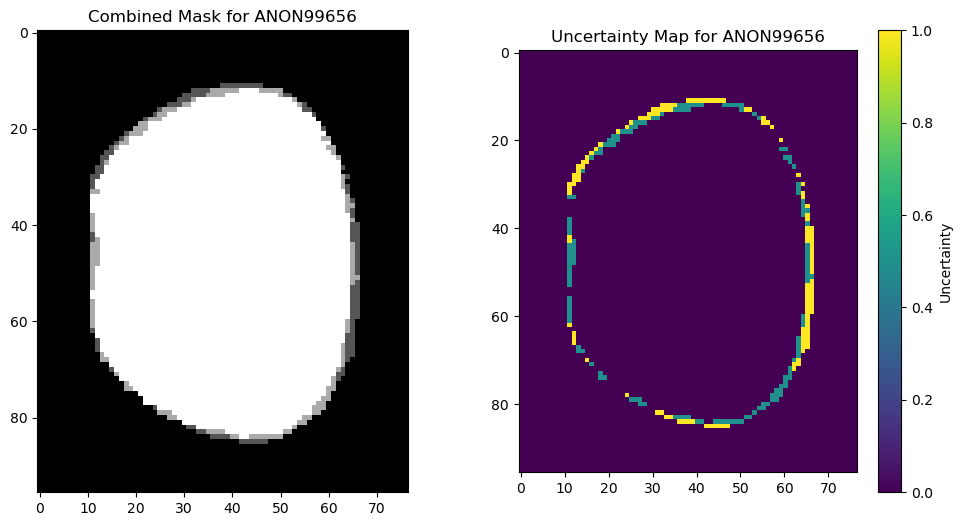

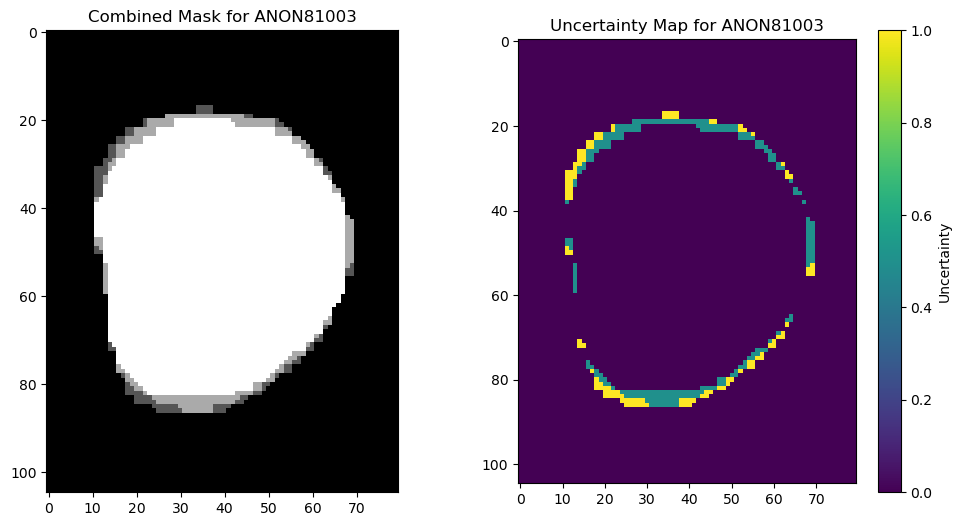

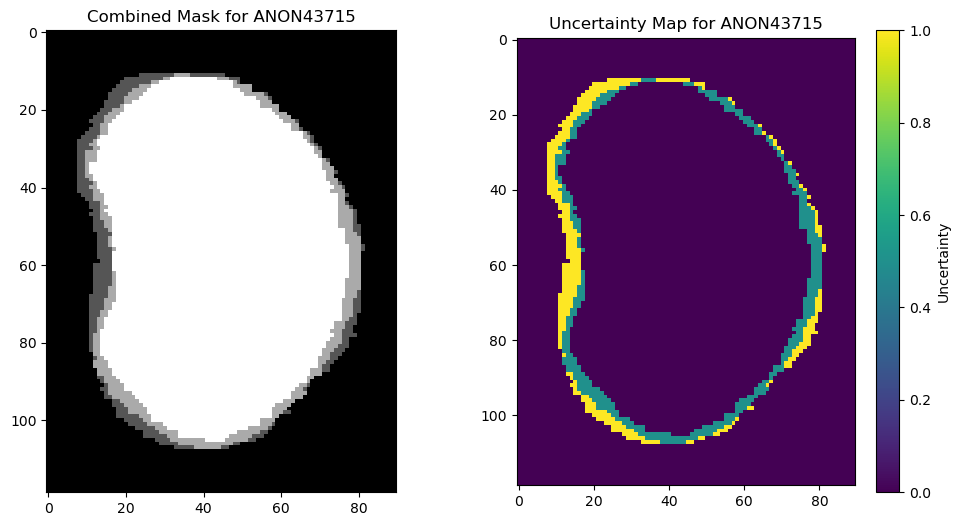

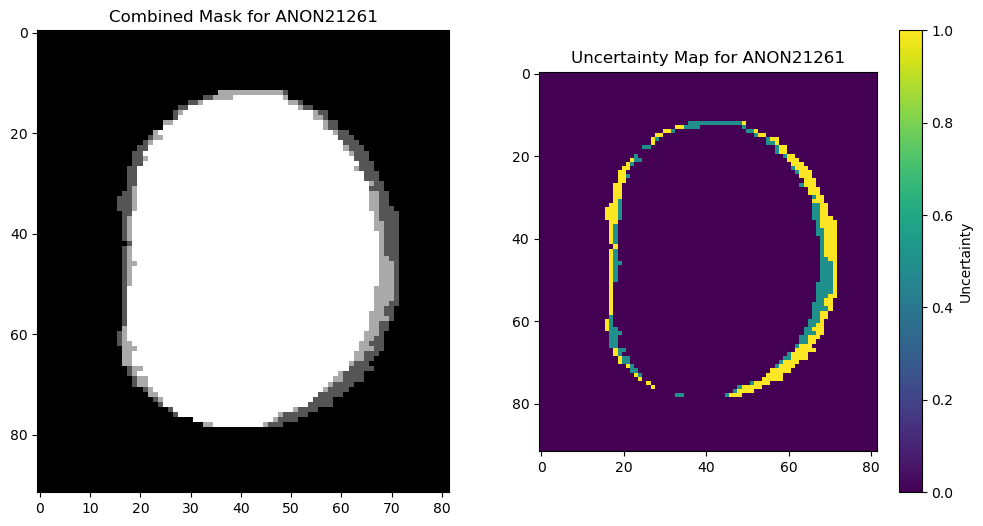

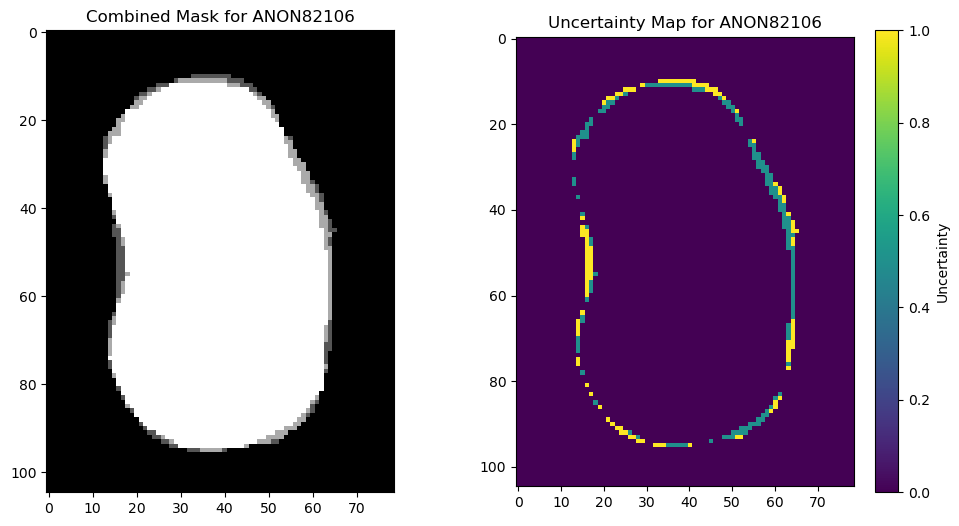

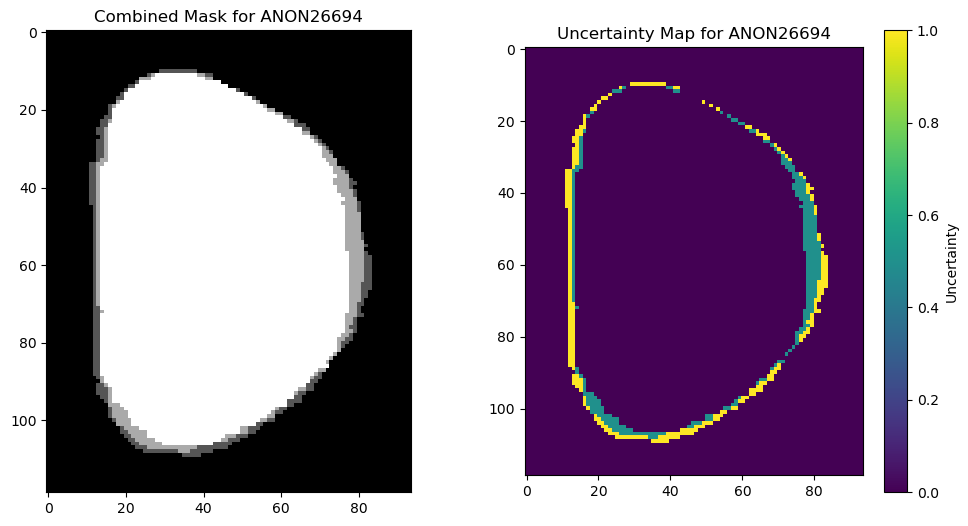

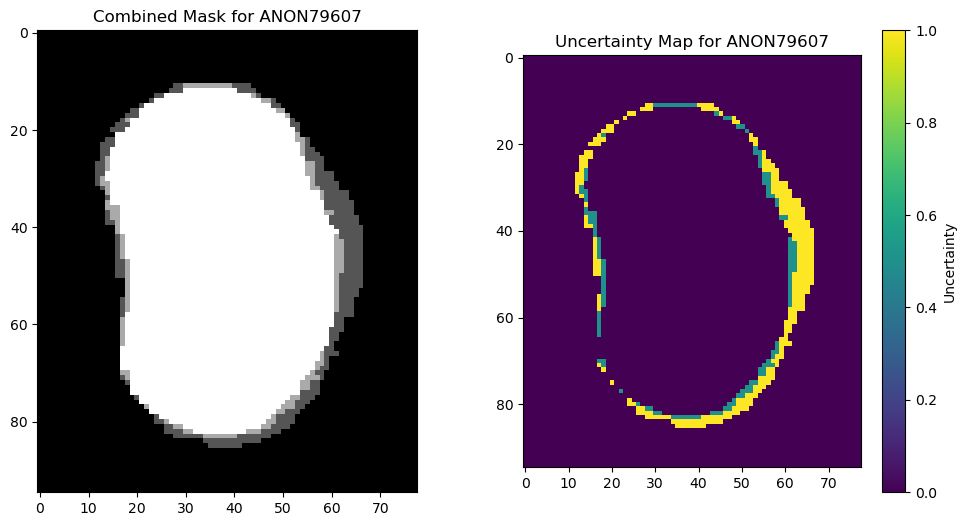

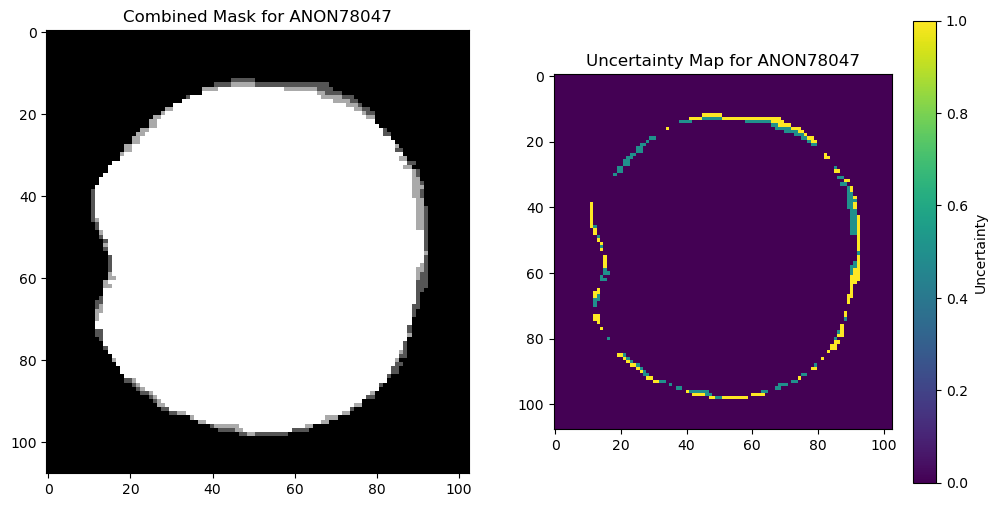

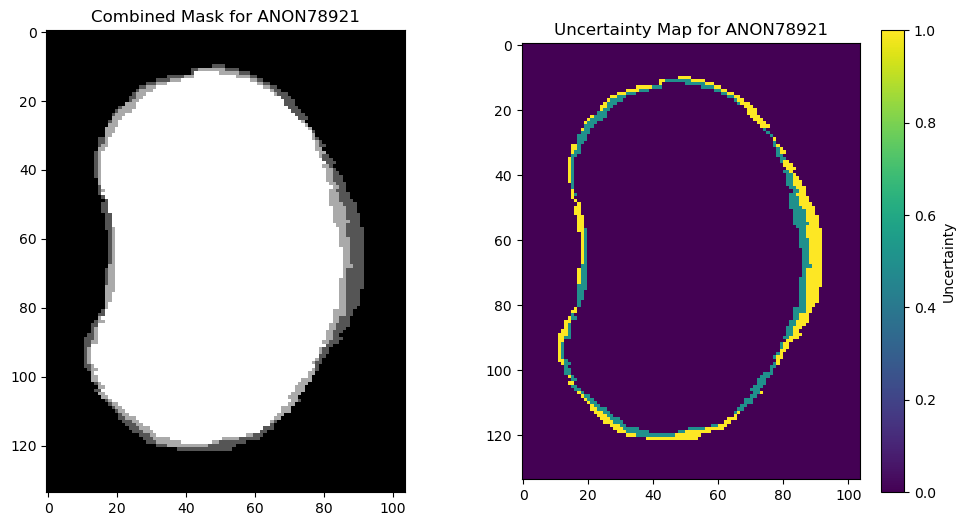

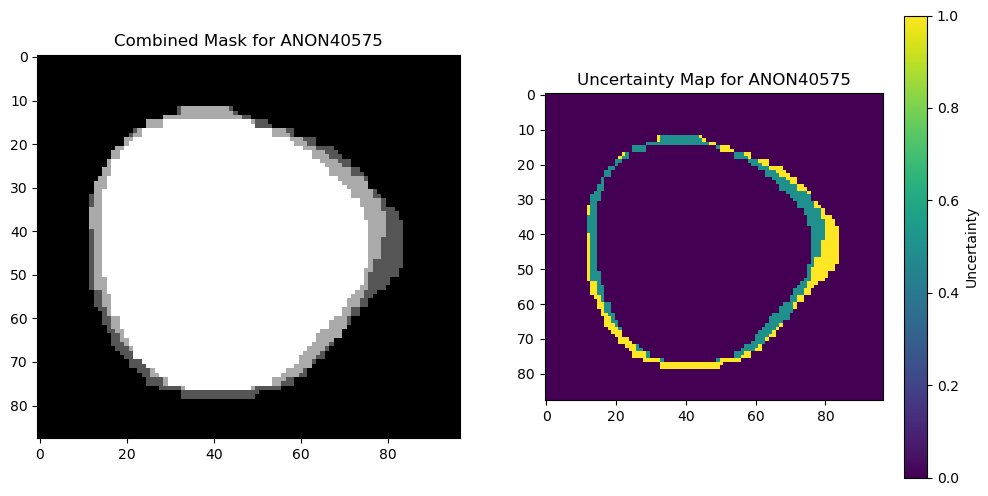

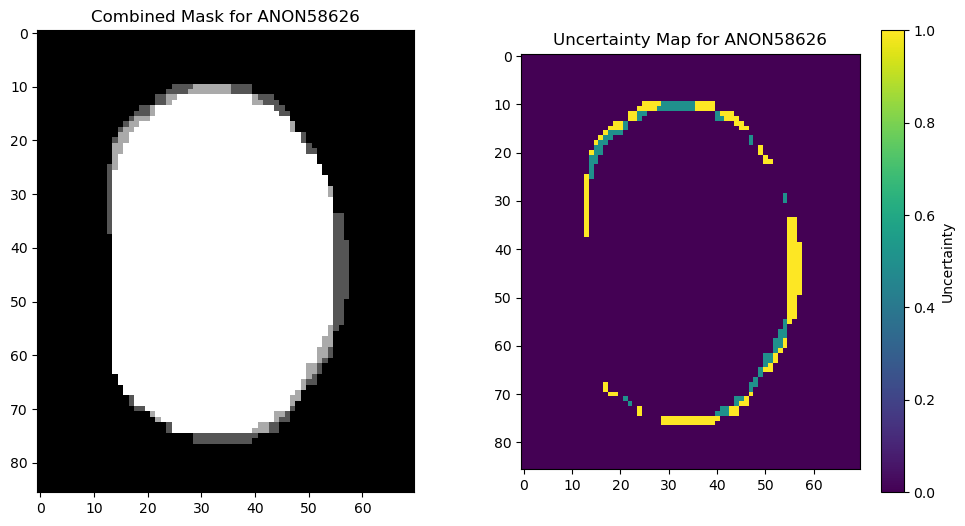

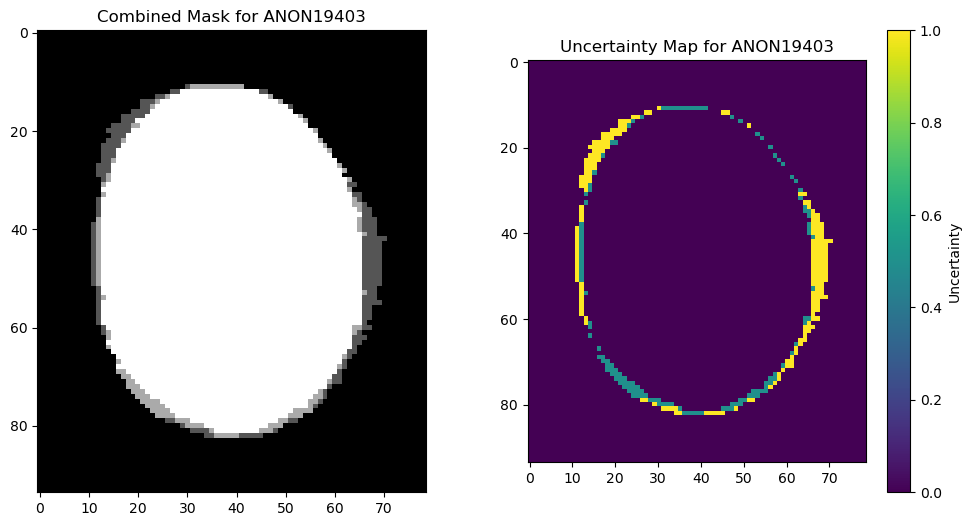

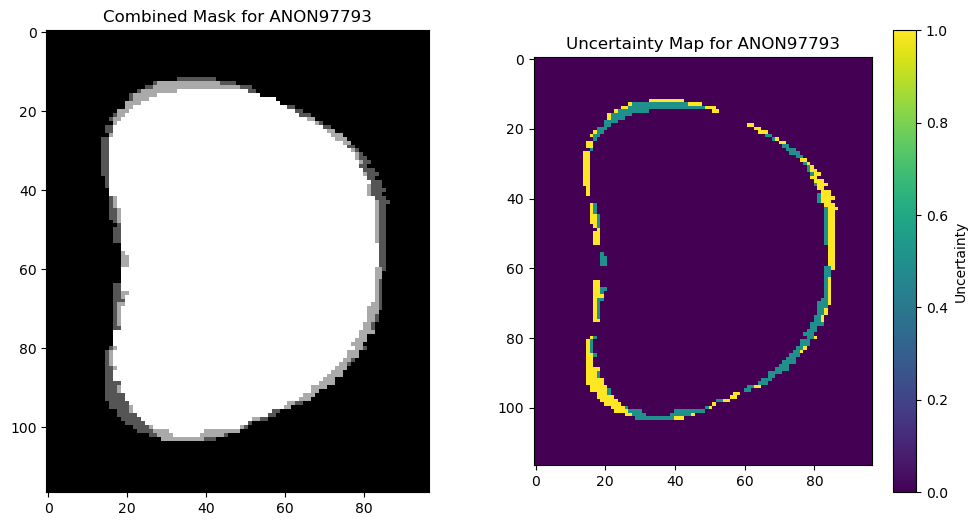

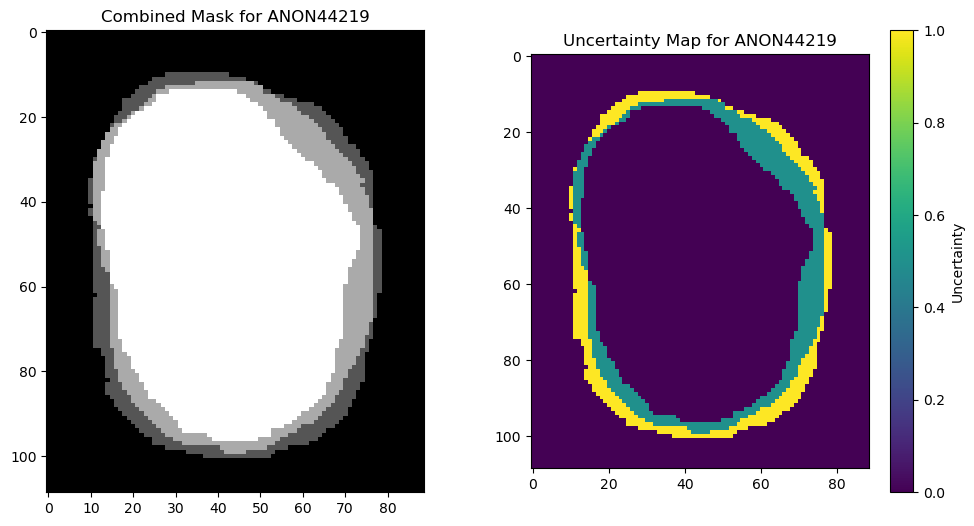

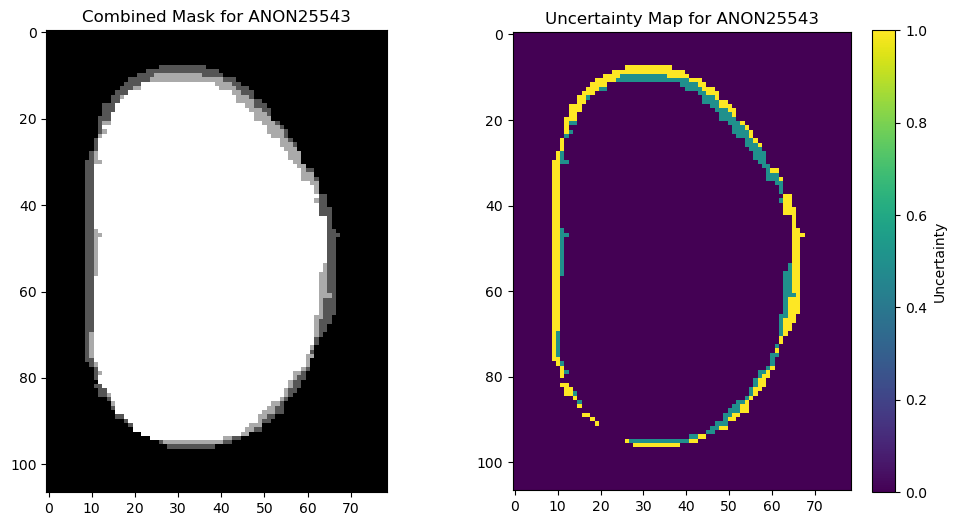

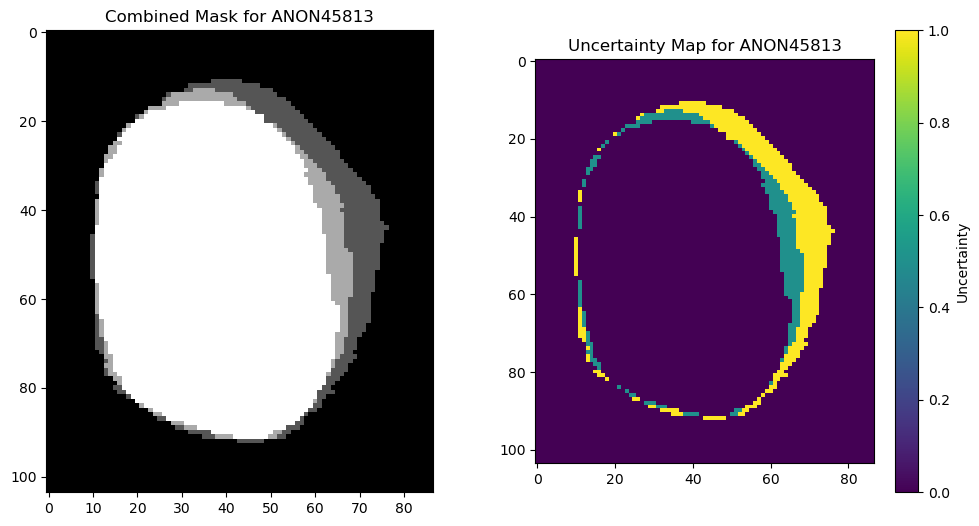

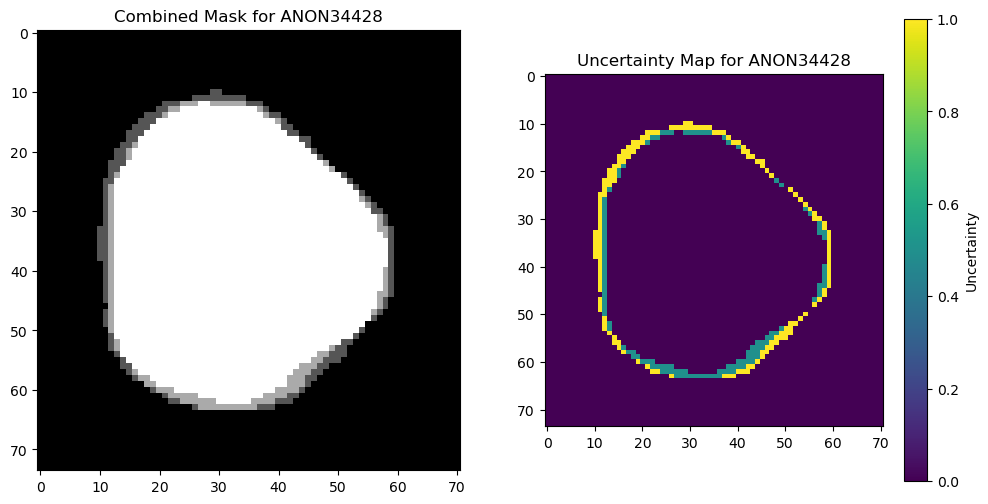

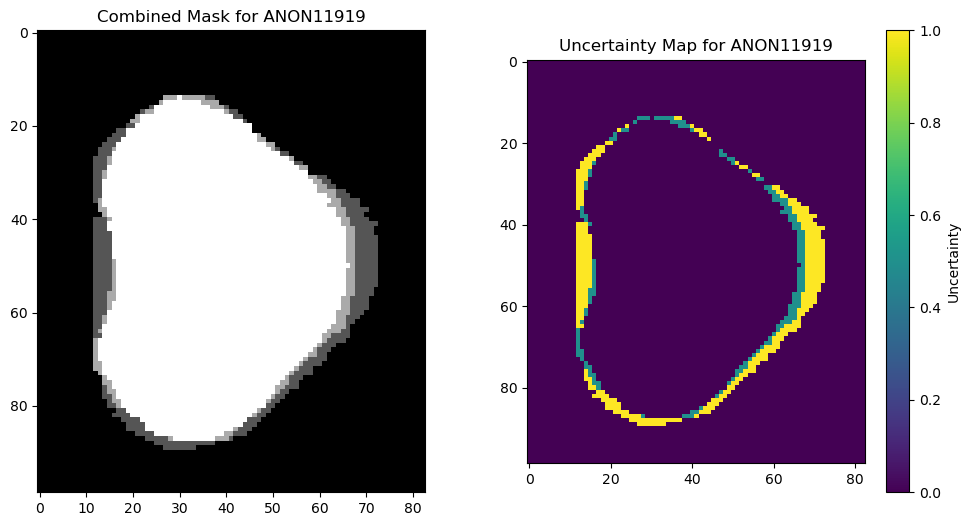

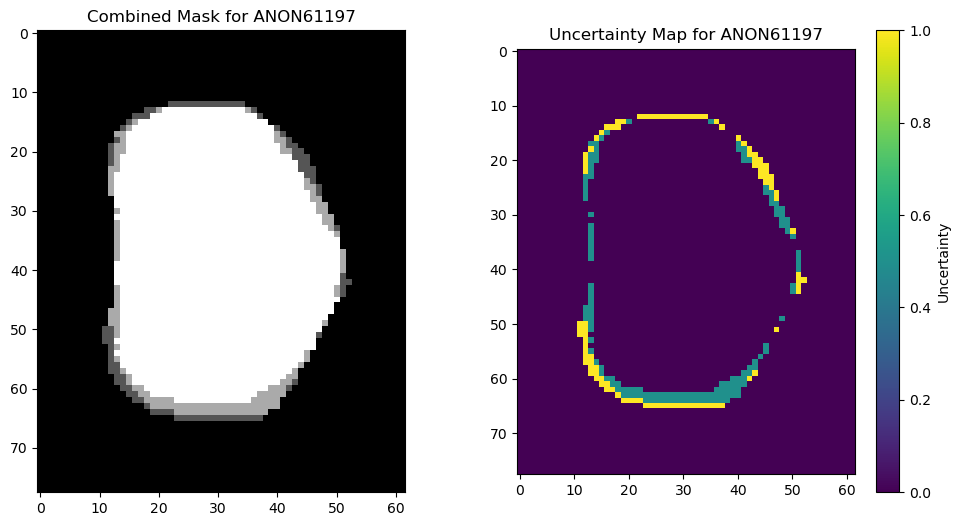

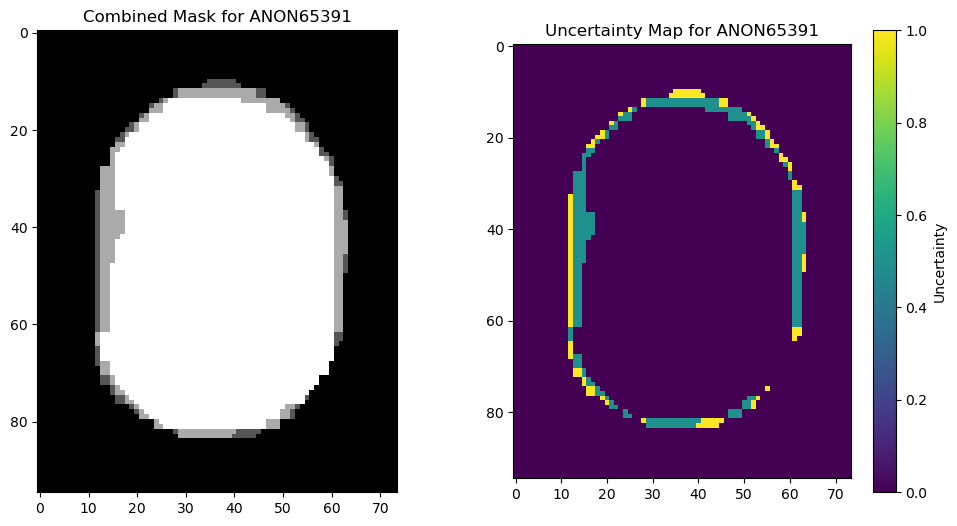

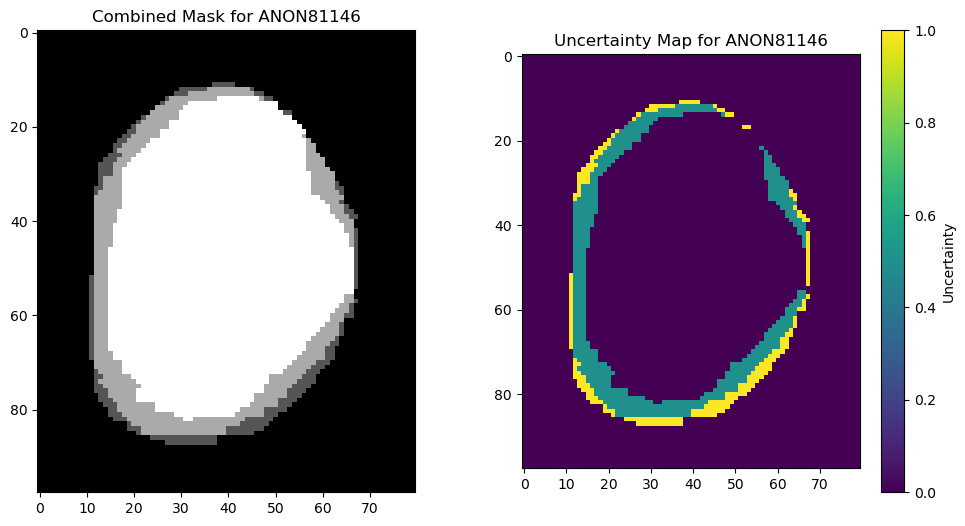

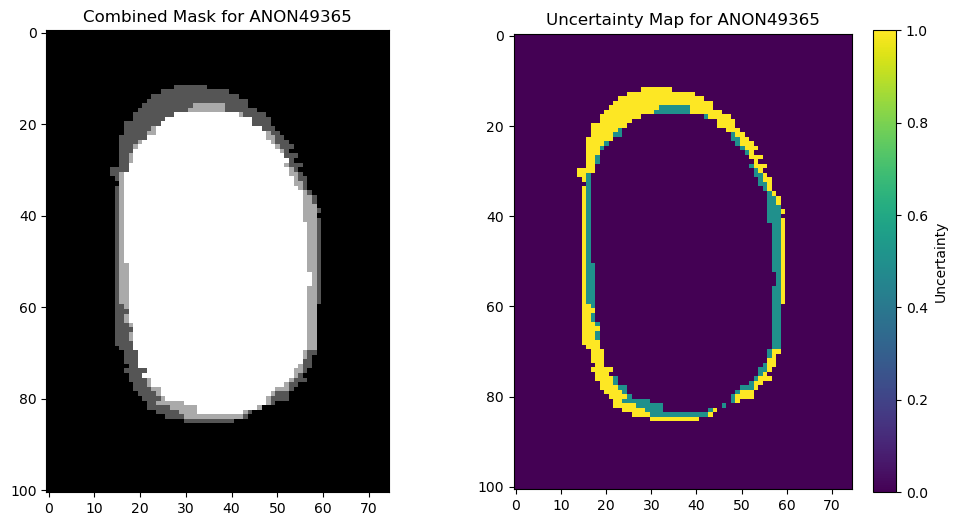

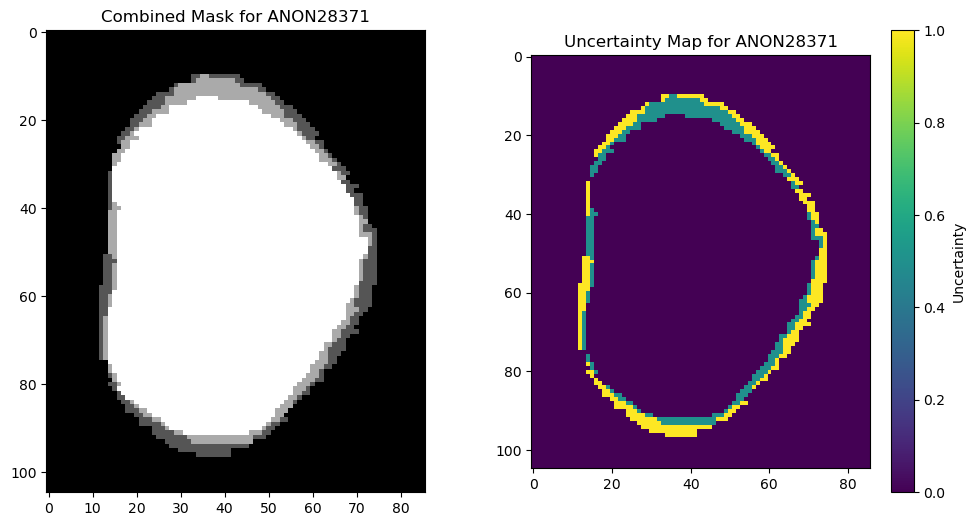

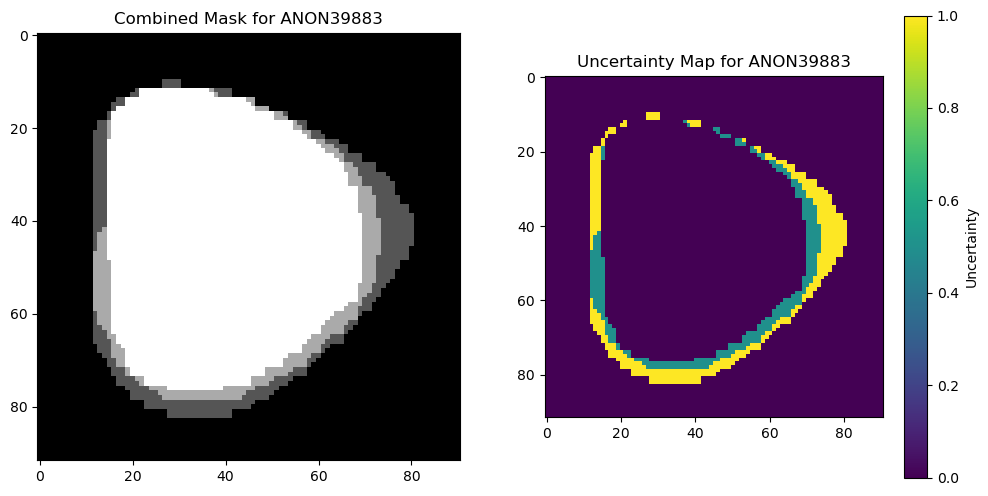

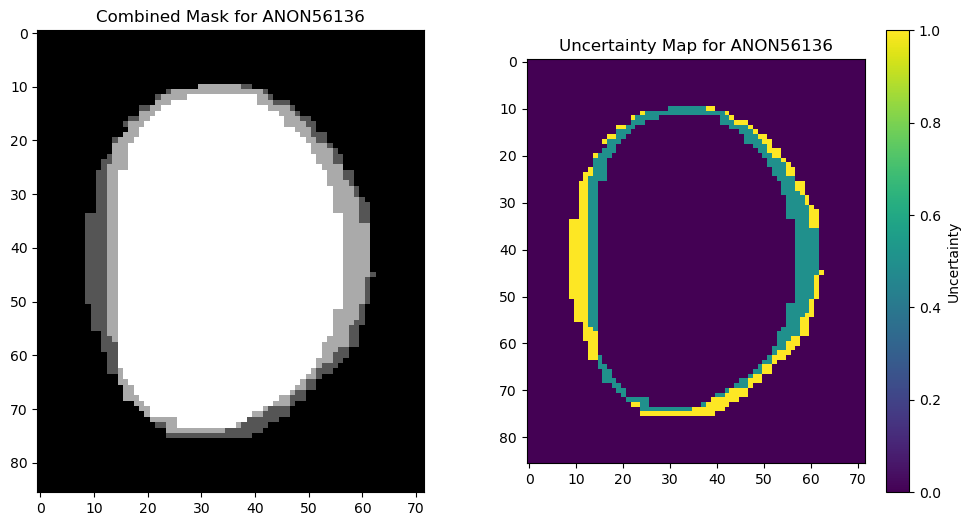

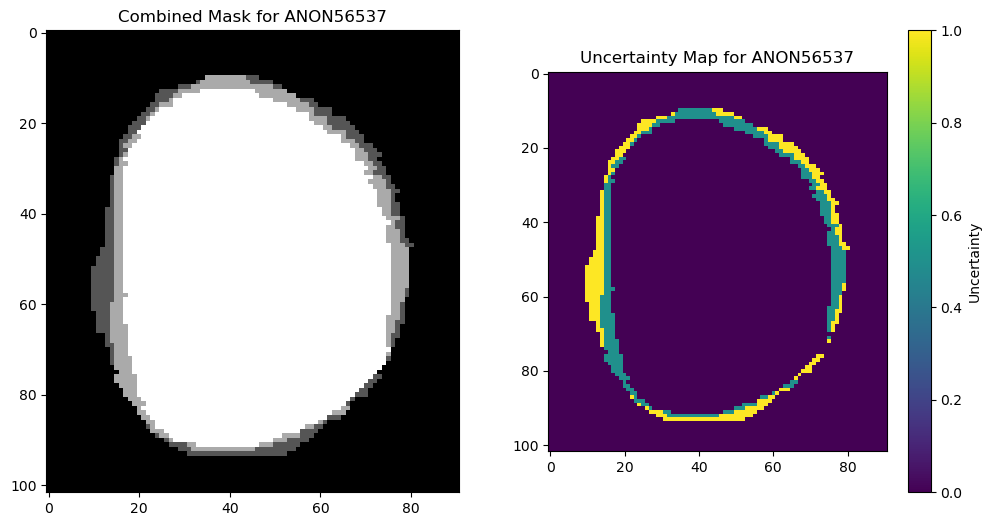

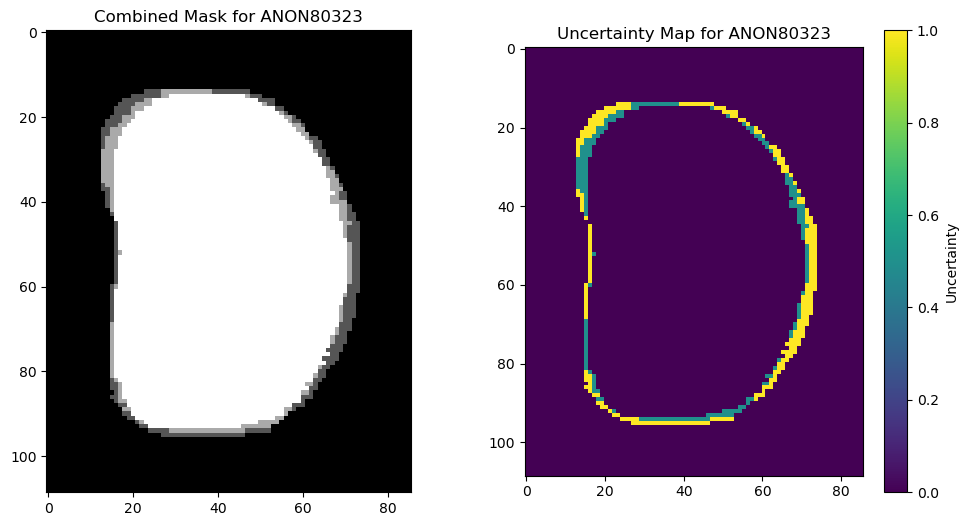

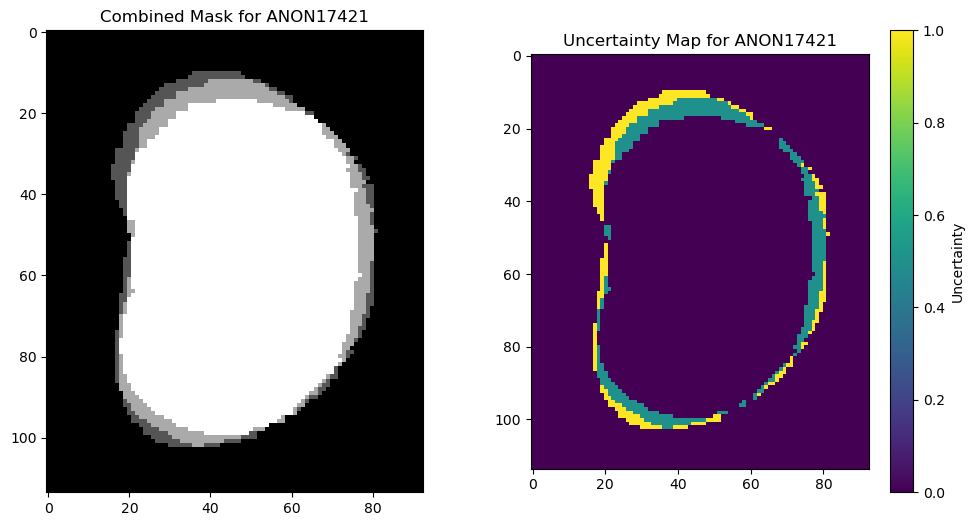

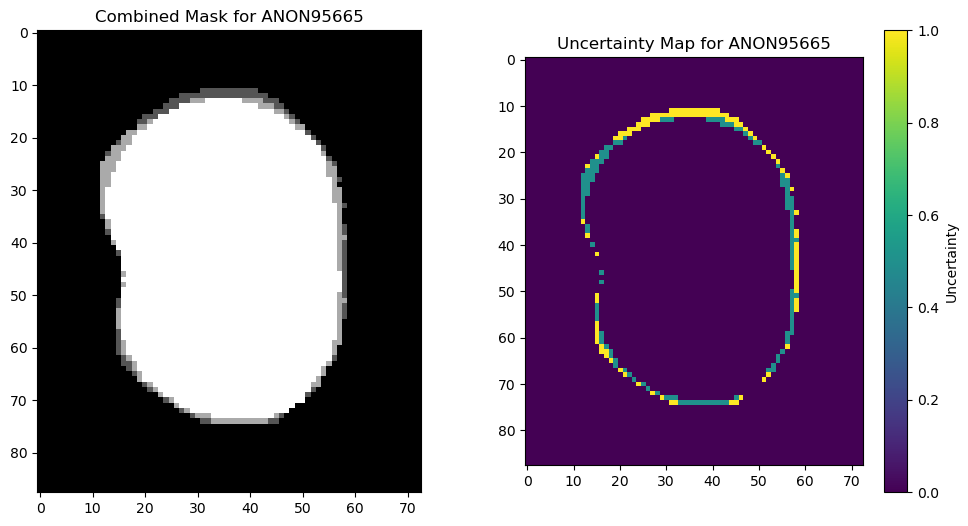

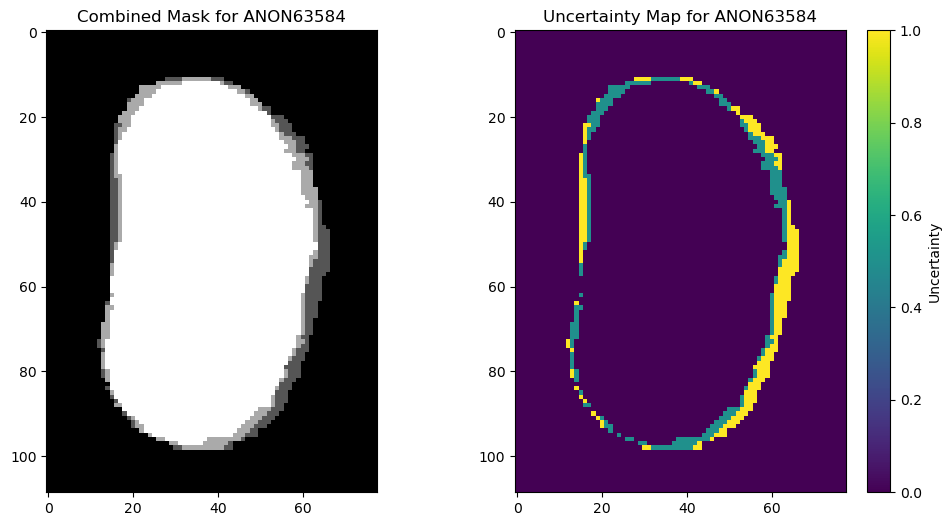

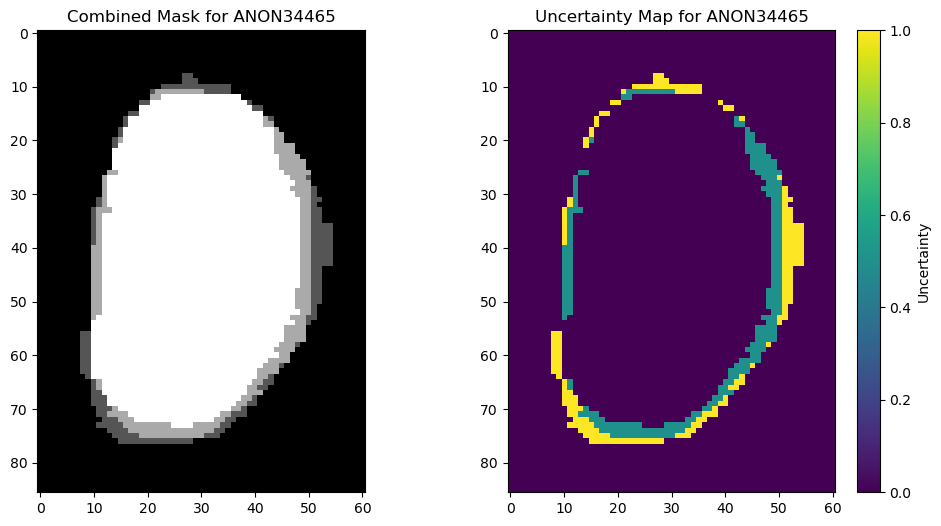

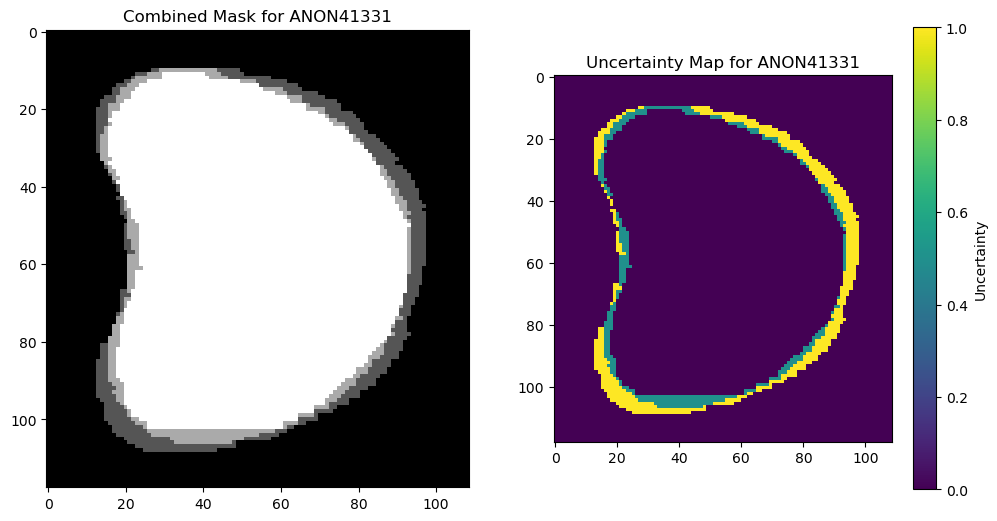

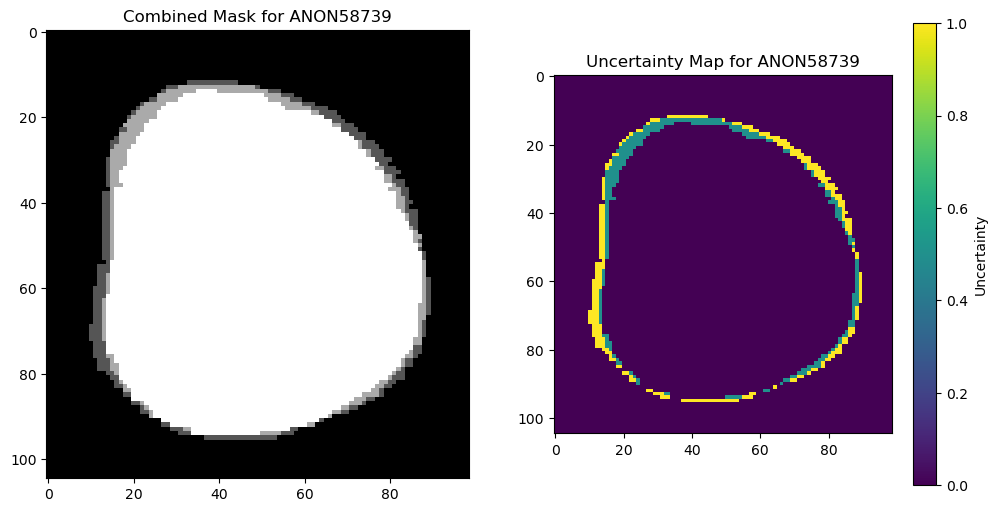

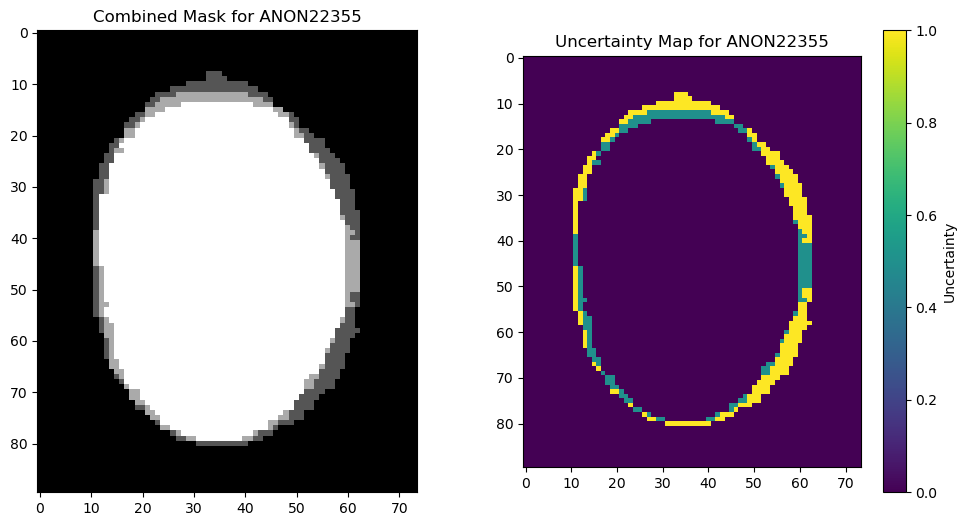

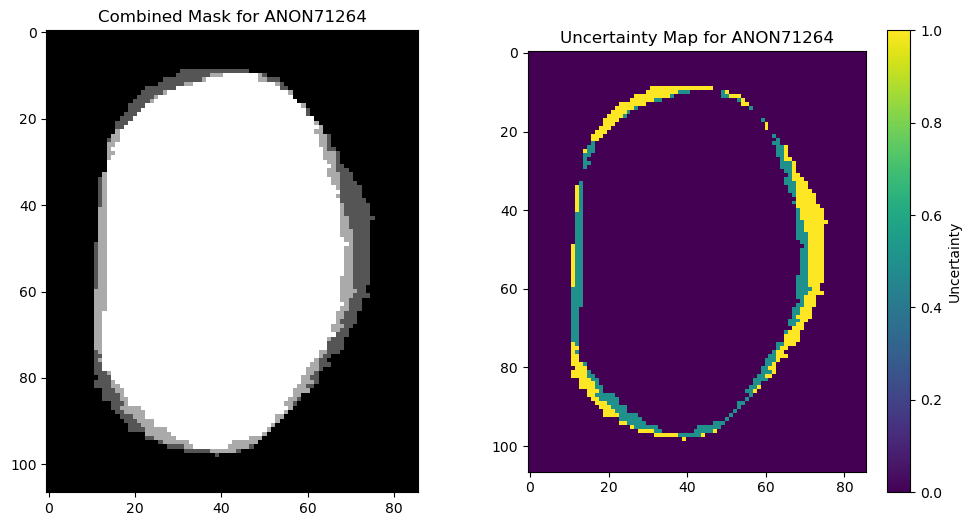

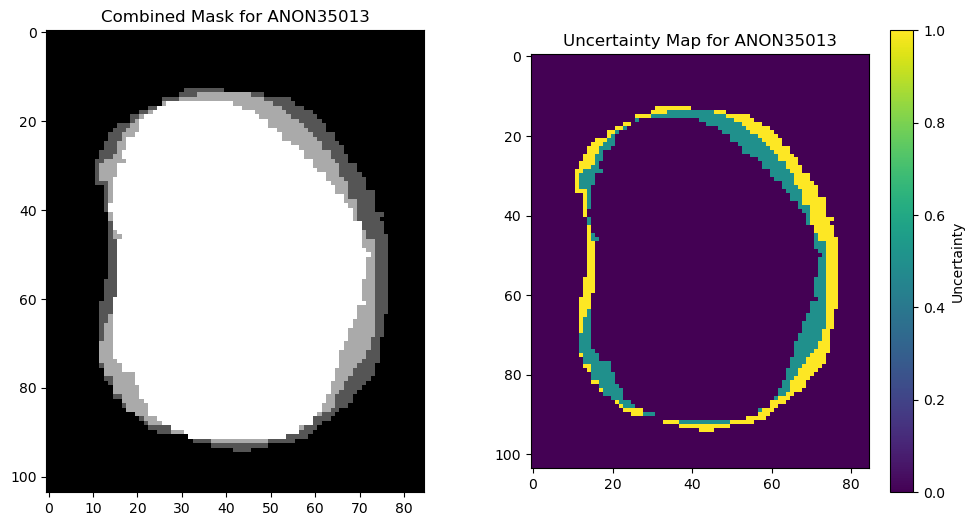

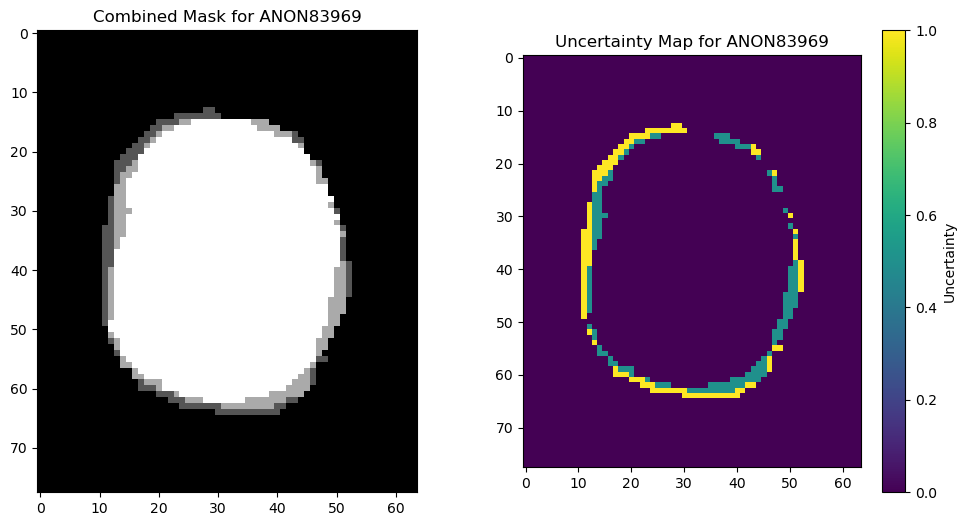

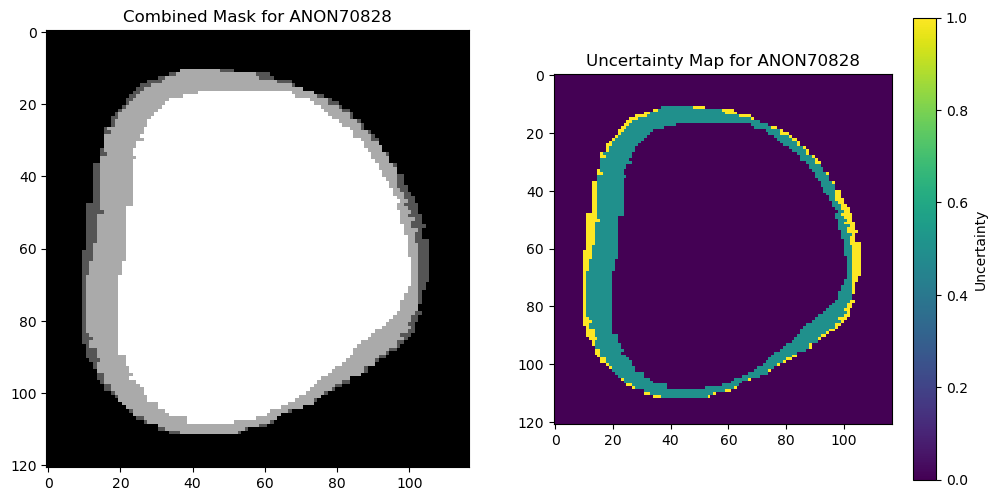

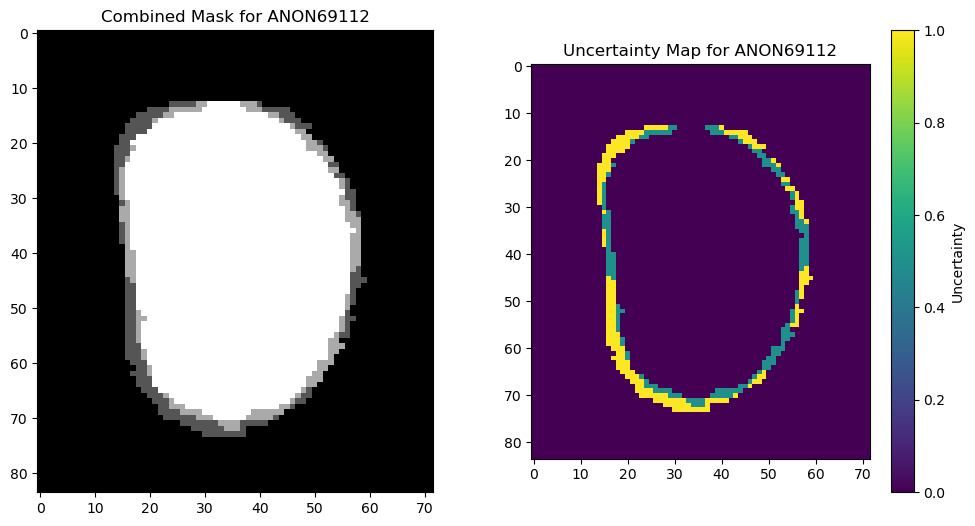

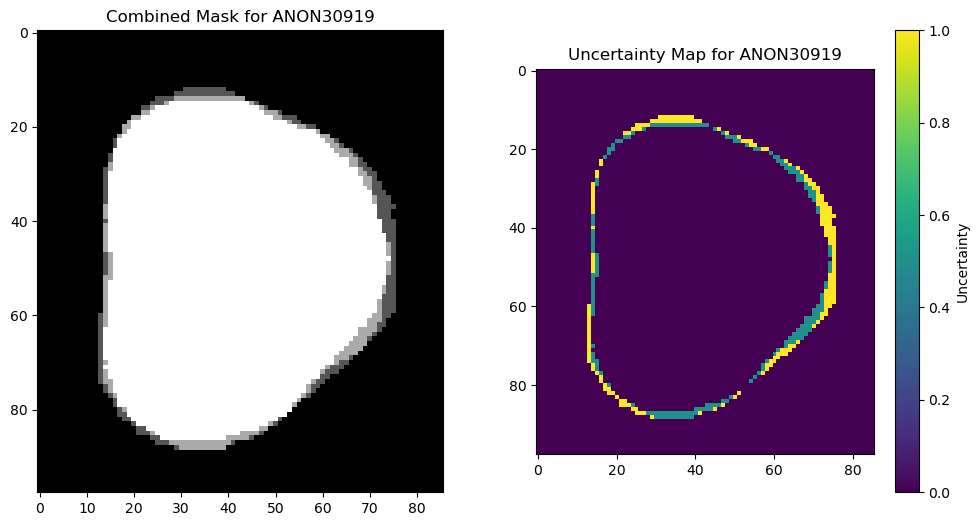

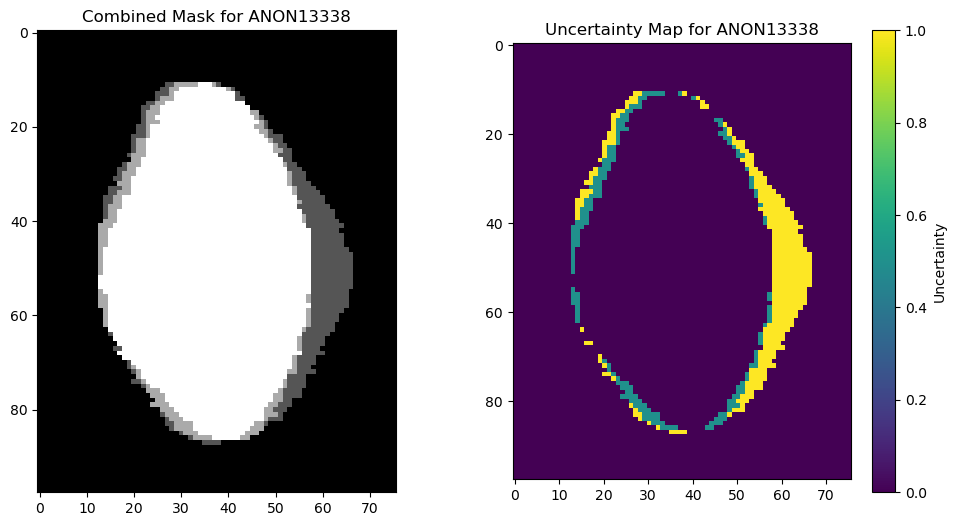

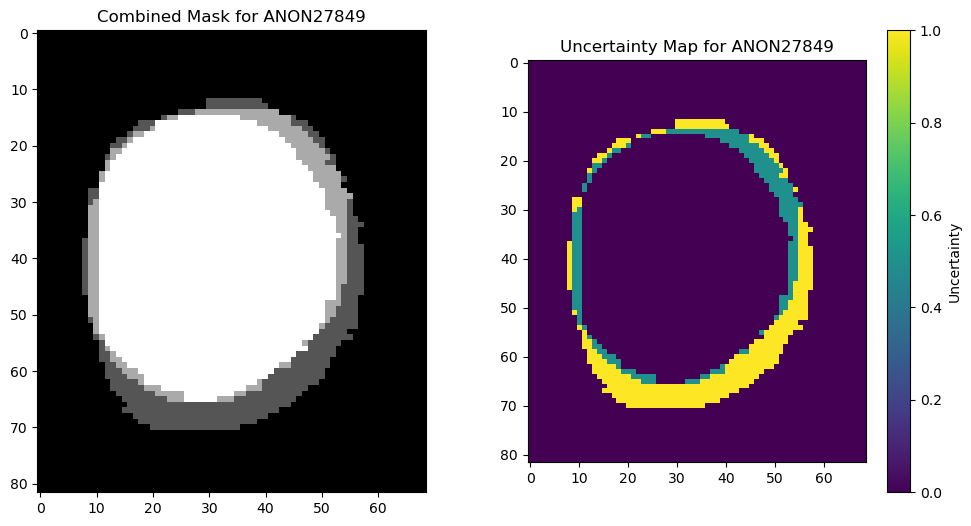

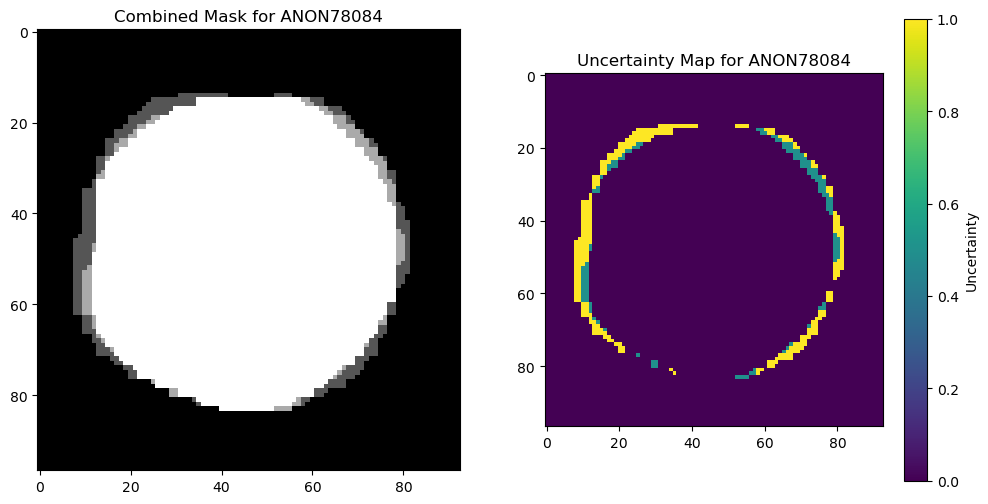

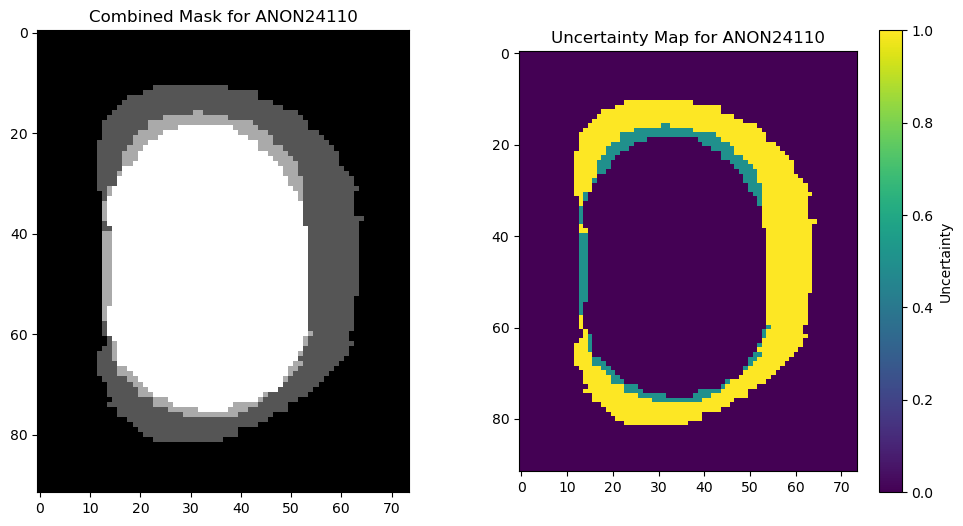

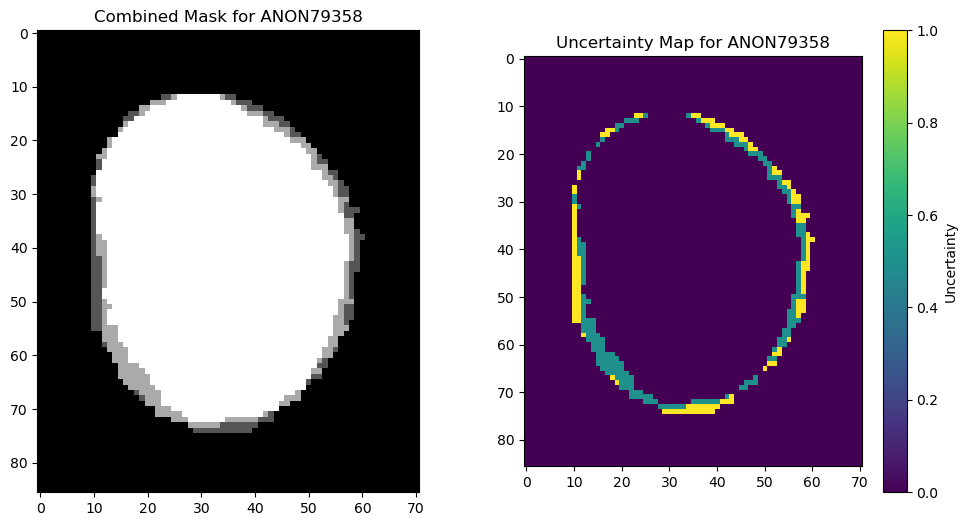

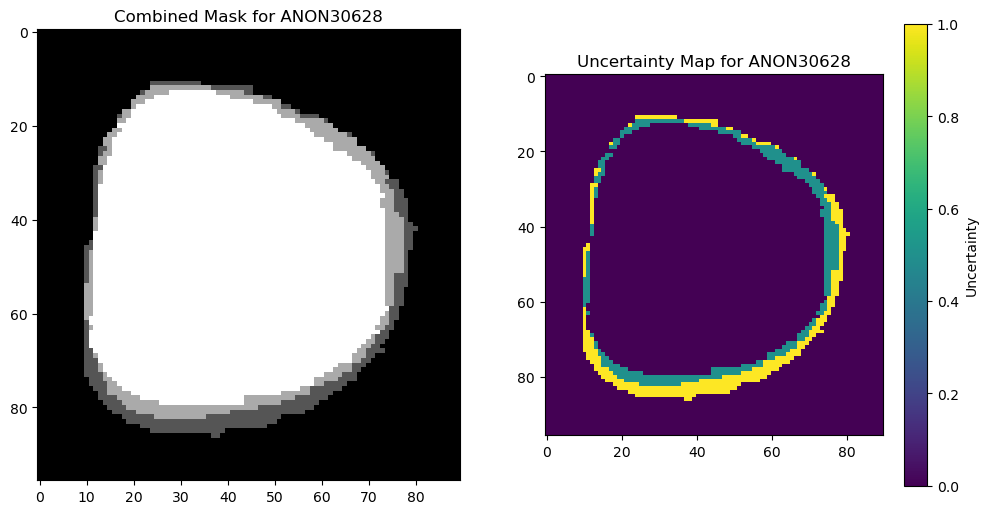

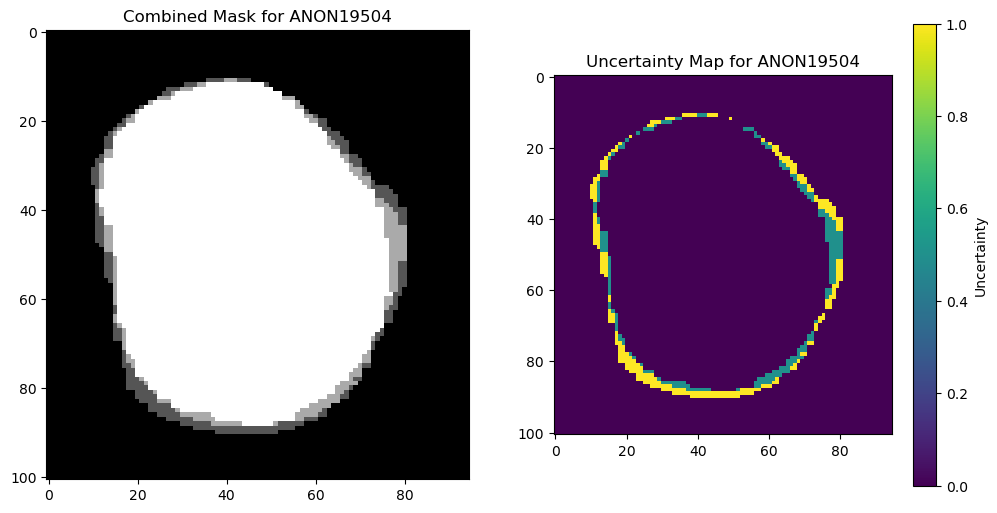

In [14]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import glob

# Define the directory where masks are stored
mask_dir = '/home/kharroubi/Dataset/Multireader_NIFTI_crop'

# Define the directory where uncertainty maps will be saved
output_dir = '/home/kharroubi/Dataset/Masks_Uncertainty_Maps'
os.makedirs(output_dir, exist_ok=True)

# Get all patient IDs
PIDs_ALL = [os.path.basename(i) for i in glob.glob(os.path.join(mask_dir, 'ANON*'))]

np.random.seed(29100)
np.random.shuffle(PIDs_ALL)

# Function to load NIfTI file
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data, img.affine, img.header

# Function to process masks for a given patient ID
def process_masks(patient_id):
    # Construct paths to the masks
    mask1_path = os.path.join(mask_dir, f'{patient_id}', 'mask_Prostate_VB.nii.gz')
    mask2_path = os.path.join(mask_dir, f'{patient_id}', 'mask_Prostate_ES.nii.gz')
    mask3_path = os.path.join(mask_dir, f'{patient_id}', 'mask_Prostate_TJ.nii.gz')

    # Load the masks
    mask1, affine, header = load_nifti(mask1_path)
    mask2, _, _ = load_nifti(mask2_path)
    mask3, _, _ = load_nifti(mask3_path)

    # Ensure masks are binary
    mask1 = (mask1 > 0).astype(int)
    mask2 = (mask2 > 0).astype(int)
    mask3 = (mask3 > 0).astype(int)

    # Combine the masks by summing them
    combined_mask = mask1 + mask2 + mask3

    # Define uncertainty levels
    uncertainty_map = np.zeros_like(combined_mask, dtype=float)

    # Low uncertainty (all masks agree)
    uncertainty_map[combined_mask == 0] = 0
    uncertainty_map[combined_mask == 3] = 0

    # Medium uncertainty (two masks agree)
    uncertainty_map[(combined_mask == 1) | (combined_mask == 2)] = 0.5

    # High uncertainty (all masks disagree)
    uncertainty_map[(combined_mask == 1)] = 1

    # Save the uncertainty map as a NIfTI file
    uncertainty_nifti = nib.Nifti1Image(uncertainty_map, affine, header)
    uncertainty_output_path = os.path.join(output_dir, f'{patient_id}_uncertainty_map.nii.gz')
    nib.save(uncertainty_nifti, uncertainty_output_path)

    # Plot the uncertainty map (for a central slice as an example)
    slice_idx = combined_mask.shape[2] // 2  # central slice for 3D volume

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(combined_mask[:, :, slice_idx], cmap='gray')
    plt.title(f'Combined Mask for {patient_id}')

    plt.subplot(1, 2, 2)
    plt.imshow(uncertainty_map[:, :, slice_idx], cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Uncertainty')
    plt.title(f'Uncertainty Map for {patient_id}')

    plt.show()

# Process masks for all patient IDs
for patient_id in PIDs_ALL:
    process_masks(patient_id)
